In [1]:
from __init__ import DATASET_PATH

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score, PredictionErrorDisplay
from tqdm import tqdm

from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, SelectPercentile
# https://jundongl.github.io/scikit-feature/algorithms.html
from skfeature.function.statistical_based import gini_index

from imblearn.over_sampling import SMOTENC

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, r_regression, f_regression, mutual_info_regression, RFECV


import dtreeviz

from textwrap import wrap
from functools import reduce

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from imblearn.pipeline import Pipeline as ImblearnPipeline

from sklearn.preprocessing import FunctionTransformer



from main.components.scaler import Scaler
from main.components.imputer import Imputer
from main.components.one_hot_encoder import CustomOneHotEncoder
from main.constants import CATEGORICAL_ATTRIBUTES, CONTINUOUS_ATTRIBUTES, IGF, PROLACTIN, VITAMINE_D, PCO
from main.components.preprocessing_methods import get_continuous_attributes_except, get_categorical_attributes_except, explore_all_variations_of_preprocessing

from main.components.hyperparameter_tuning_methods import hyperparameter_tuning_clasification_smote,validate_model_classification_smote, hyperparameter_tuning_linear_on_preprocessed_dataset, hyperparameter_tuning_general, hyperparameter_tuning_linear, compare_random_states, train_model, validate_model_classification
from main.components.feature_importance_methods import feature_selection_gini_index, feature_selection_chi2, plot_fancy_tree, plot_fancy_tree_smote, get_feature_importance_logistic_regressison, get_feature_importance_tree, get_feature_importance_rf, rename_importnace_col, merge_feature_importances, rank_importances, feature_selection_mutual_info_classification, recursive_feature_elimination, get_permutation_importance


import nest_asyncio
nest_asyncio.apply()

pd.set_option('display.max_columns', None) # enable showing all columns of the df
pd.set_option('display.max_rows', None)
pd.set_option("display.expand_frame_repr", True)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)


In [2]:
dataset_file_path = DATASET_PATH
df = pd.read_csv(dataset_file_path)
df.sample(5)

PCO 0-healthy control, 1-PCOS, 2-FHA 3-POF, 4-High Andro  IGF-1 ng/ml (N: 100-311)  proBNP  AMH (ng/ml) *7,14=pmol/l  weight  height (cm)        BMI  systolic BP (ciśnienie skurczowe)  diastolic BP (ciśnienie rozskurczowe)  Hypertension  Waist Circumference (WC)  WC>88  Hip Circumference (HC)  WHR (Waist/Hip ratio)  WHR>0,85 (WHO)  WHR>0,8 (NIDDK)  WHTR (Waist/Height Ratio)  WHTR>0,5  overweight/obesity 0-normal/low, 1-overweight, 2-obesity  irregular cycles (0-nie, 1-tak)  ovulation (0-brak, 1-obecna)  PCO ovary morfology in USG (0-brak, 1--obecna)  stromal hypertrophy in ovary (0-brak, 1-obecny)  acne  hirsutism  FG score (Ferriman-Gallway score - stopień androgenizacji)  hyperandrogenism  elevated DHT  hypothyroidism  Volume of the thyroid  Right Lobe  Volume of the thyroid  Left Lobe  thyroid volume  nodules 0-lack, 1-RL,  2-LL, 3-both  chronic thyroiditis  Vole of the Right Ovary  Volume of the  Left Ovary  ovaries volume - total  follicules >12  WBC x10^3/ul  \
244                                                         1                       NaN     NaN                       NaN    69.0        168.0  24.447279                              114.0                                   82.0           0.0                      73.0    0.0                    90.0               0.811111             0.0              1.0                   0.434524       0.0                                                       0.0                              1.0                           1.0                                             1.0                                              1.0   1.0        0.0                                                         3.0               1.0           NaN             0.0                           5.252235                          3.310848        8.563083                                  NaN                  NaN                    11.52                      16.16                   27.68             1.0         10.02   
154                                                         0                       NaN   29.30                       NaN    57.0        161.0  21.989892                                NaN                                    NaN           NaN                      72.0    0.0                    86.0               0.837209             0.0              1.0                   0.447205       0.0                                                       0.0                              NaN                           NaN                                             NaN                                              NaN   0.0        0.0                                                         NaN               NaN           NaN             0.0                           5.096000                          6.084000       11.180000                                  1.0                  0.0                      NaN                        NaN                     NaN             NaN          6.93   
96                                                          0                     298.0   36.51                       NaN    72.0        165.0  26.446281                              138.0                                   65.0           0.0                      91.0    1.0                    97.0               0.938144             1.0              1.0                   0.551515       1.0                                                       1.0                              0.0                           1.0                                             0.0                                              1.0   0.0        0.0                                                         0.0               1.0           1.0             0.0                           4.725000                          3.705000        8.430000                                  0.0                  1.0                     3.84                       5.17                    9.01             0.0          6.54   
819                                                      

Remove `POF`,  `FHA`, `High Andro` classes

In [3]:
df.loc[(df[PCO] != 0) & (df[PCO] != 1), PCO] = np.nan

CLASS_NAMES = ['healthy', 'PCOS']

In [4]:
df_cleaned = df.dropna(subset=[PCO])

X, y = df_cleaned.drop(columns=[PCO]), df_cleaned[PCO]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(742, 135)


<Axes: >

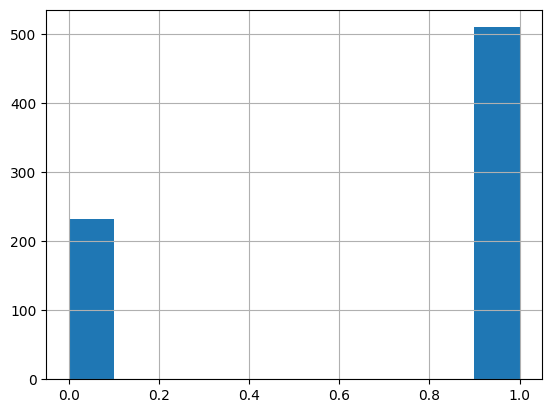

In [5]:
print(df_cleaned.shape)
df_cleaned[PCO].hist()

### Preprocessing

### For SMOTE

In [6]:
continuous_imputer_pipeline = Pipeline([('scaler', MinMaxScaler()), ('imputer', KNNImputer(n_neighbors=7))])
continuous_imputer_tree_pipeline = Pipeline([('imputer', KNNImputer(n_neighbors=7))])

categorical_imputer_pipeline = Pipeline([
    ('imputer', IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=10, n_jobs=-1), max_iter=40, initial_strategy='most_frequent')),
    ])

### For training without SMOTE

In [7]:
continuous_preprocessor_tree = Pipeline([('imputer', KNNImputer(n_neighbors=7))])

continuous_preprocessor = Pipeline([('scaler', MinMaxScaler()), ('imputer', KNNImputer(n_neighbors=7))])
categorical_preprocessor = Pipeline([('imputer', IterativeImputer(estimator=KNeighborsClassifier(n_neighbors=10, n_jobs=-1), max_iter=40, initial_strategy='most_frequent')), ('one_hot_encoder', OneHotEncoder(handle_unknown='error', drop='if_binary'))])


preprocessor = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ('num', continuous_preprocessor, CONTINUOUS_ATTRIBUTES),
        ('cat', categorical_preprocessor, get_categorical_attributes_except(PCO))
    ])

## Hyperparameter tuning

### Decision Tree

In [47]:
model_tree = DecisionTreeClassifier()
param_grid_tree = {
    'model__criterion': ['gini'],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [4, 5, 6],
    'model__min_samples_leaf': [3, 4, 5],
    # 'model__class_weight': [None],
}

tree_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_tree, continuous_preprocessor_tree, categorical_preprocessor, param_grid_tree, scoring_metric='f1_weighted')
tree_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 27 candidates, totalling 405 fits
Best parameters: {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 5, 'model__min_samples_split': 4}
Best score (f1_weighted): 0.7925917562781579


c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


params  mean_train_score  mean_test_score
15  {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 5, 'model__min_samples_split': 4}          0.894761         0.792592
9   {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 3, 'model__min_samples_split': 4}          0.902010         0.791779
21  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 4}          0.924528         0.790763
25  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 5, 'model__min_samples_split': 5}          0.919061         0.789570
22  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5}          0.924662         0.789416
16  {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 5, 'model__min_samples_split': 5}          0.895081         0.788455
20  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}          0.931673         0.788242
23  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.924683         0.788072
11  {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}          0.902190         0.787664
10  {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5}          0.902190         0.787317
17  {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 5, 'model__min_samples_split': 6}          0.895081         0.786060
19  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5}          0.931689         0.785330
24  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 5, 'model__min_samples_split': 4}          0.919196         0.784963
13  {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5}          0.899338         0.784487
26  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 5, 'model__min_samples_split': 6}          0.919061         0.783910
12  {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 4}          0.899202         0.783709
18  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 4}          0.931689         0.782818
14  {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.899202         0.782315
0   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 4}          0.858188         0.781619
5   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.856764         0.781403
4   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5}          0.856764         0.781118
8   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 6}          0.855616         0.780797
1   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 5}          0.858188         0.780567
6   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 4}          0.855616         0.779951
3   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 4}          0.856764         0.779559
7   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 5}          0.855616         0.779522
2   {'

In [46]:
# smote
model_tree = DecisionTreeClassifier()
param_grid_tree = {
    'model__criterion': ['gini'],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [6, 7],
    'model__min_samples_leaf': [3, 4, 5],
    # 'class_weight': [None],
}

tree_h_scores = hyperparameter_tuning_clasification_smote(X_train, y_train, PCO, model_tree, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, param_grid_tree, scoring_metric='f1_weighted')
tree_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 18 candidates, totalling 270 fits


Best parameters: {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 7}
Best score (f1_weighted): 0.8171377254697492


c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


params  mean_train_score  mean_test_score
9   {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 7}          0.886062         0.817138
10  {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 5, 'model__min_samples_split': 6}          0.884012         0.816319
7   {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 3, 'model__min_samples_split': 7}          0.888899         0.815930
11  {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 5, 'model__min_samples_split': 7}          0.884261         0.815804
6   {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}          0.889724         0.813816
8   {'model__criterion': 'gini', 'model__max_depth': 4, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.886208         0.812037
1   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 7}          0.846894         0.809779
0   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}          0.846894         0.809779
3   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 7}          0.846344         0.808498
2   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.846483         0.807439
5   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 7}          0.845405         0.807257
4   {'model__criterion': 'gini', 'model__max_depth': 3, 'model__min_samples_leaf': 5, 'model__min_samples_split': 6}          0.845690         0.805899
17  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 5, 'model__min_samples_split': 7}          0.906602         0.803780
16  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 5, 'model__min_samples_split': 6}          0.907613         0.802351
12  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 6}          0.919246         0.800626
15  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 7}          0.911621         0.800045
13  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 3, 'model__min_samples_split': 7}          0.918568         0.799357
14  {'model__criterion': 'gini', 'model__max_depth': 5, 'model__min_samples_leaf': 4, 'model__min_samples_split': 6}          0.911071         0.798001

In [ ]:
model = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_leaf=2, min_samples_split=5, splitter='random')

tuned_df = compare_random_states(X_train, y_train, model, PCO, continuous_preprocessor_tree, categorical_preprocessor)
tuned_df.abs.sort_values(by='cv_score', ascending=False).head(5)

### Logistic Regression

Fitting 15 folds for each of 8 candidates, totalling 120 fits


c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


Best parameters: {'model__C': 1}
Best score (f1_weighted): 0.8523705193673403


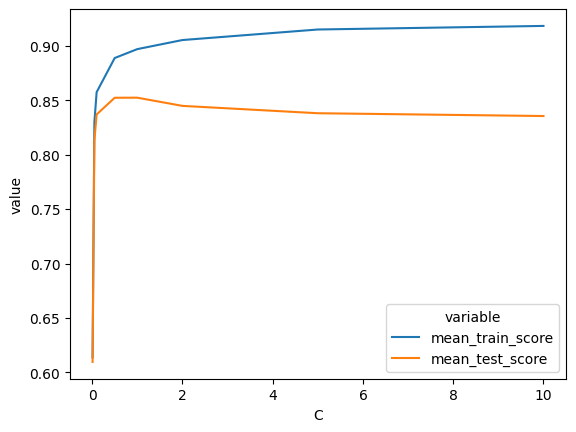

C  mean_train_score  mean_test_score
0  0.01          0.613782         0.609591
1  0.05          0.829612         0.813253
2   0.1          0.857442         0.836952
3   0.5          0.888798         0.852298
4     1          0.896976         0.852371
5     2          0.905327         0.844841
6     5          0.915013         0.838083
7    10          0.918300         0.835518

In [13]:
model_lr = LogisticRegression(max_iter=100000, n_jobs=-1)

param_grid_lr = {
    'model__C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10],
}

lr_h_scores = hyperparameter_tuning_linear_on_preprocessed_dataset(X_train, y_train, PCO, model_lr, param_grid_lr, main_parameter='C', scoring_metric='f1_weighted')
lr_h_scores

Selected C=0.1

### Random Forest

In [ ]:
model_rf = RandomForestClassifier(n_jobs=-1)

param_grid_rf = {
    'model__criterion': ['gini'],
    'model__class_weight': ['balanced_subsample'],
    'model__n_estimators': [200],
    'model__max_features': ['sqrt'],
    'model__max_depth': [None],
    'model__min_samples_split': [3, 4, 5],
    'model__min_samples_leaf': [5, 6, 7],
}

rf_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_rf, continuous_preprocessor_tree, categorical_preprocessor, param_grid_rf, scoring_metric='f1_weighted')
rf_h_scores.sort_values(by='mean_test_score', ascending=False)

Fitting 15 folds for each of 9 candidates, totalling 135 fits
Best parameters: {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 5, 'model__n_estimators': 200}
Best score (f1_weighted): 0.7826160815395791


params  mean_train_score  mean_test_score
8  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.913822         0.782616
4  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.928839         0.780565
2  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.948672         0.780479
3  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.930861         0.778460
1  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.948119         0.778261
5  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 6, 'model__min_samples_split': 5, 'model__n_estimators': 200}          0.929055         0.778234
6  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.915132         0.777261
0  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 5, 'model__min_samples_split': 3, 'model__n_estimators': 200}          0.947720         0.775780
7  {'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 4, 'model__n_estimators': 200}          0.912644         0.774311

In [ ]:
model = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

tuned_df = compare_random_states(X_train, y_train, model, PCO, continuous_preprocessor_tree, categorical_preprocessor)
tuned_df.abs().sort_values(by='cv_score', ascending=False).head(5)

### SVM

In [ ]:
model_svc = SVC(n_jobs=-1, decision_function_shape='ovo')

param_grid_svc = {
    'model__kernel': ['linear', 'rbf', 'sigmoid'],
    'model__C': [0.1, 1, 10, 100],
    'model__gamma': [0.1, 1, 10],
    'model__epsilon': [0.1, 0.2, 0.3],
}

svc_h_scores = hyperparameter_tuning_general(X_train, y_train, PCO, model_svc, continuous_preprocessor, categorical_preprocessor, param_grid_svc, scoring_metric='f1_weighted')
svc_h_scores.sort_values(by='mean_test_score', ascending=False)

## Best models

### DecisionTree

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


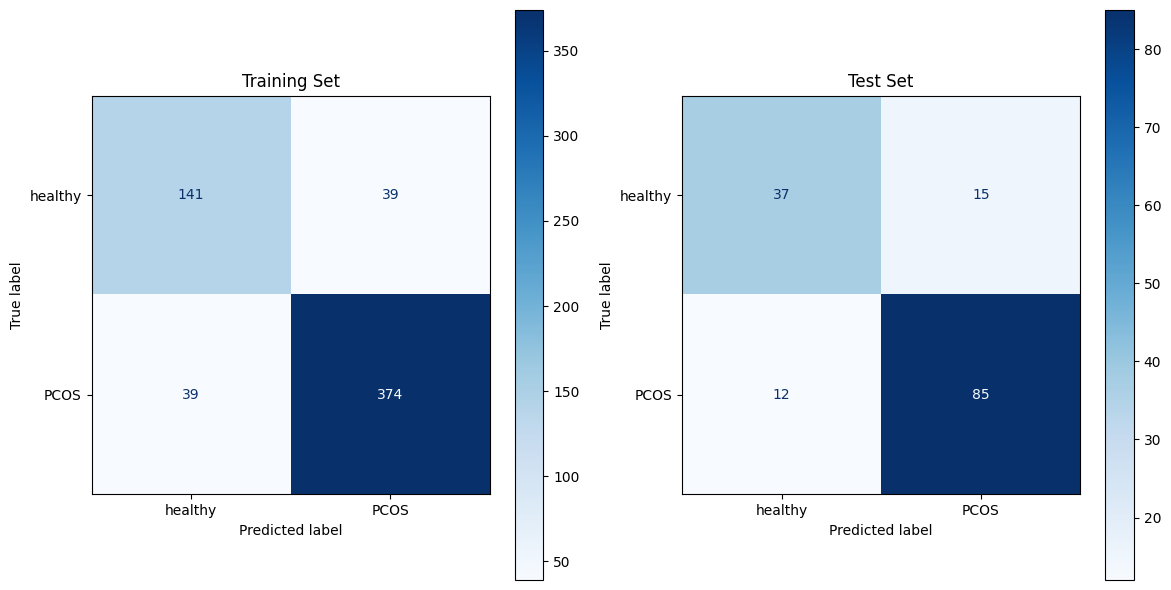

Training set
              precision    recall  f1-score   support

     healthy       0.78      0.78      0.78       180
        PCOS       0.91      0.91      0.91       413

    accuracy                           0.87       593
   macro avg       0.84      0.84      0.84       593
weighted avg       0.87      0.87      0.87       593

Test set
              precision    recall  f1-score   support

     healthy       0.76      0.71      0.73        52
        PCOS       0.85      0.88      0.86        97

    accuracy                           0.82       149
   macro avg       0.80      0.79      0.80       149
weighted avg       0.82      0.82      0.82       149



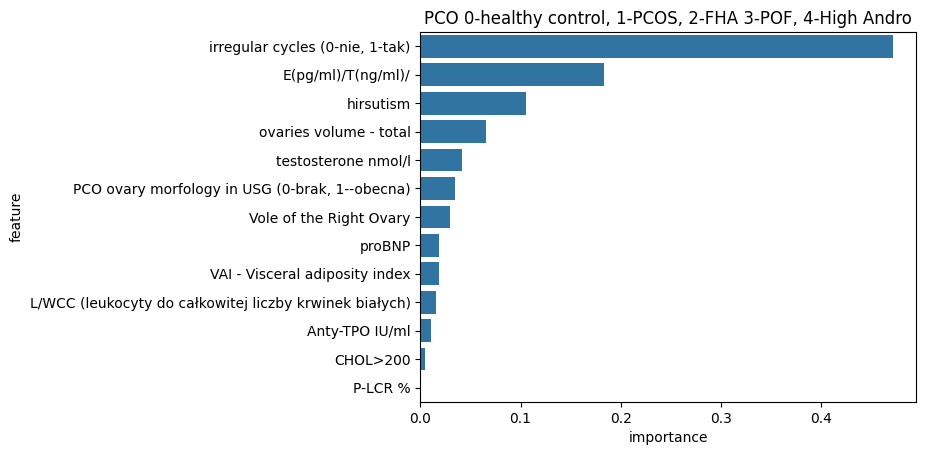

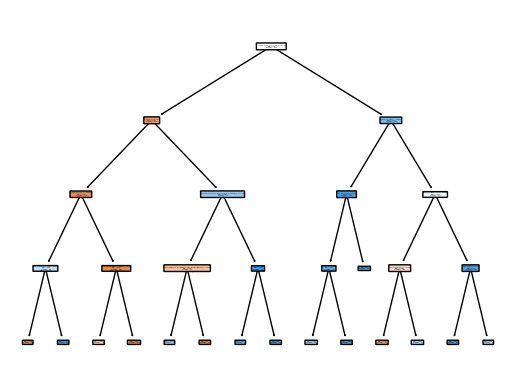

In [8]:
#  SMOTE
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=5, min_samples_split=6, class_weight=None)

feature_importnces_tree, pipeline_tree = validate_model_classification_smote(model_tree, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, get_feature_importance_tree)

# plot_fancy_tree_smote(pipeline_tree, X_train, y_train, PCO, show_artificial_data=True, class_names=CLASS_NAMES)

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


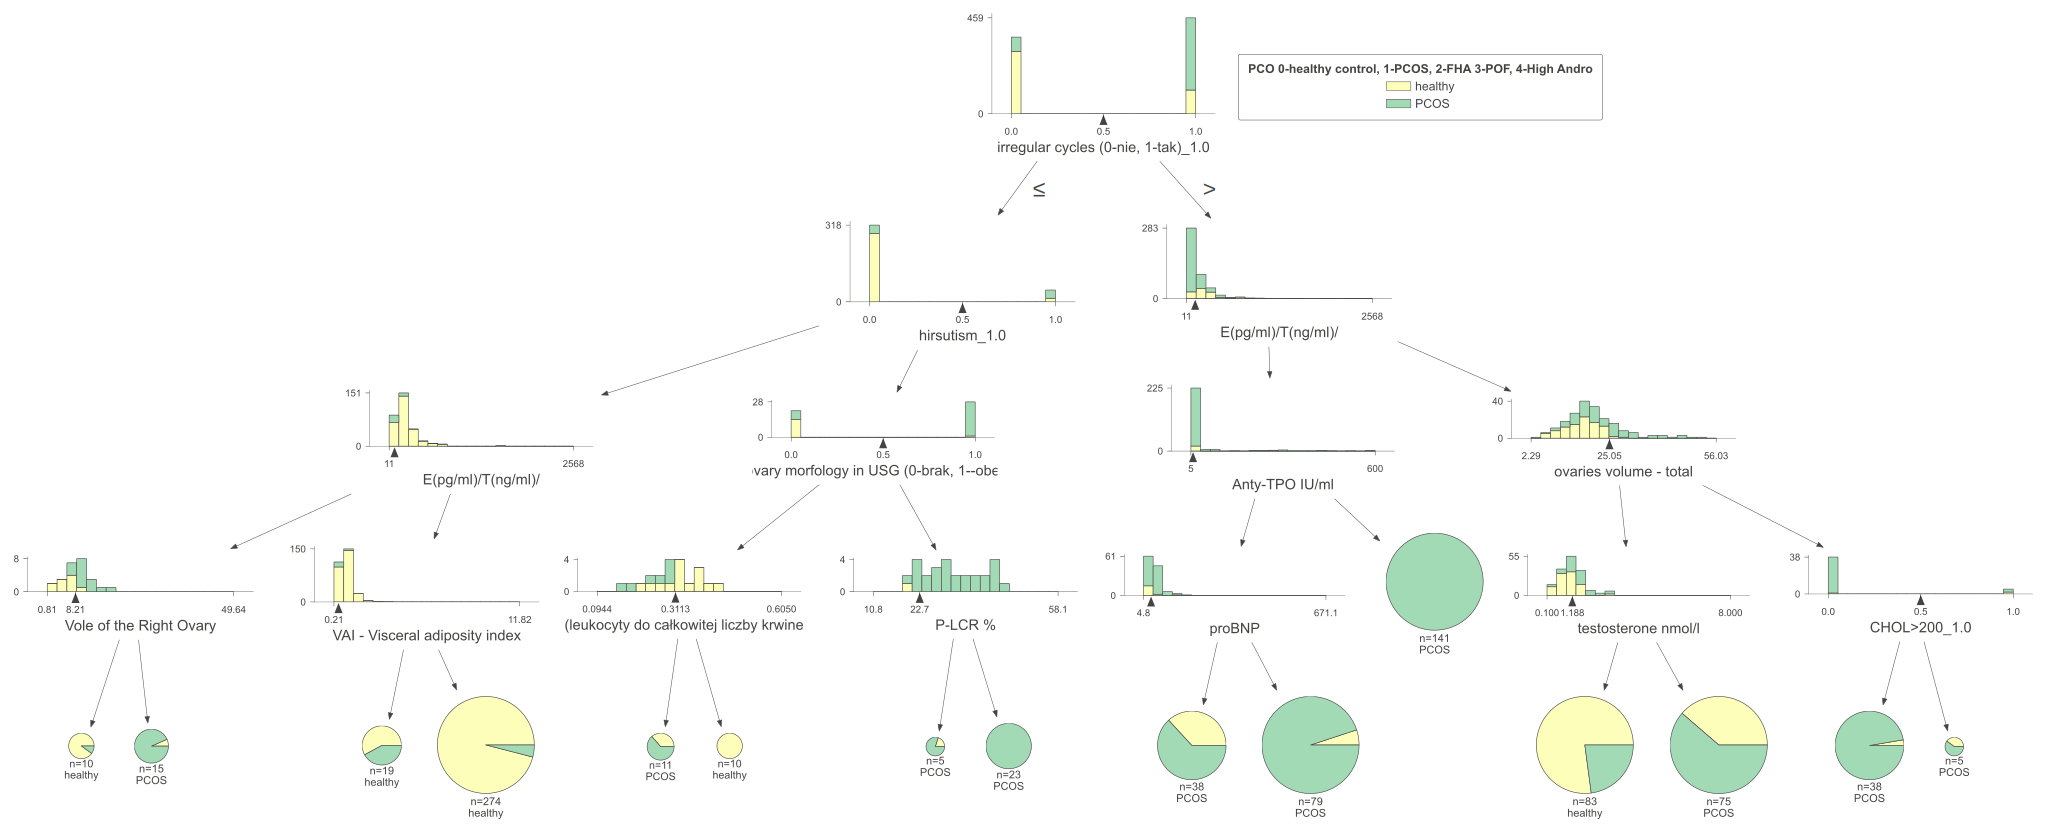

In [9]:
#  SMOTE - tree drawn with also artificial data
plot_fancy_tree_smote(pipeline_tree, X_train, y_train, PCO, show_artificial_data=True, class_names=CLASS_NAMES)

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


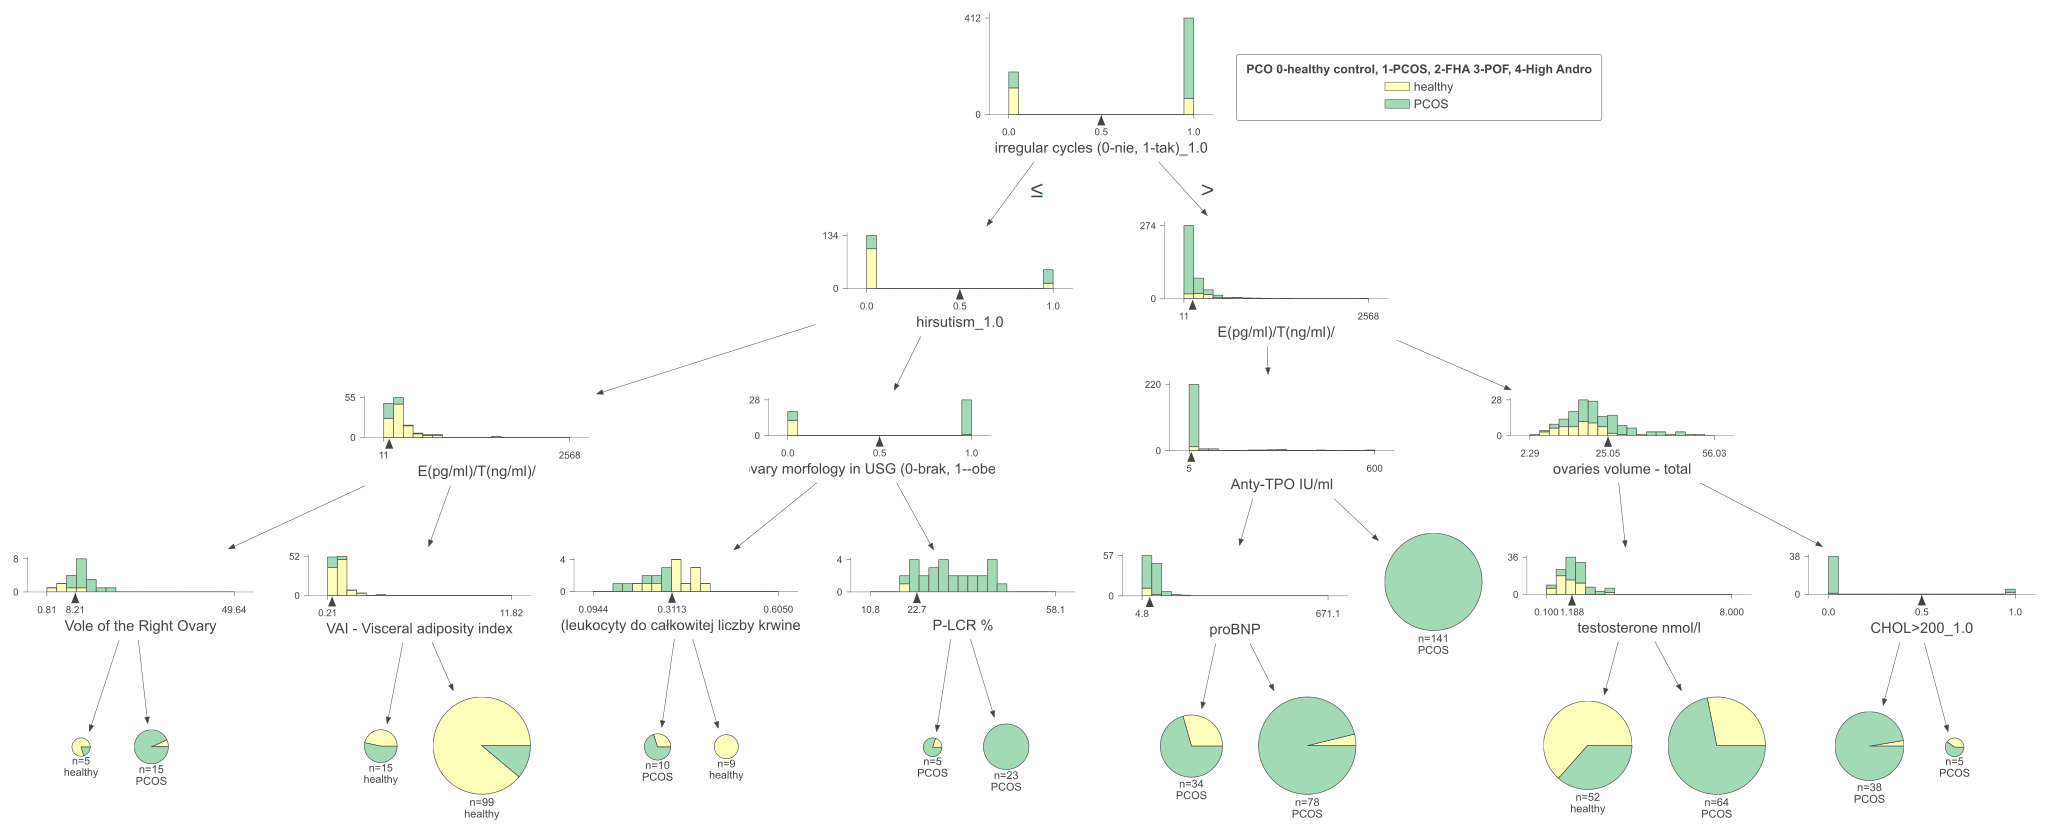

In [10]:
#  SMOTE - tree drawn with only real data
plot_fancy_tree_smote(pipeline_tree, X_train, y_train, PCO, show_artificial_data=False, class_names=CLASS_NAMES)

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


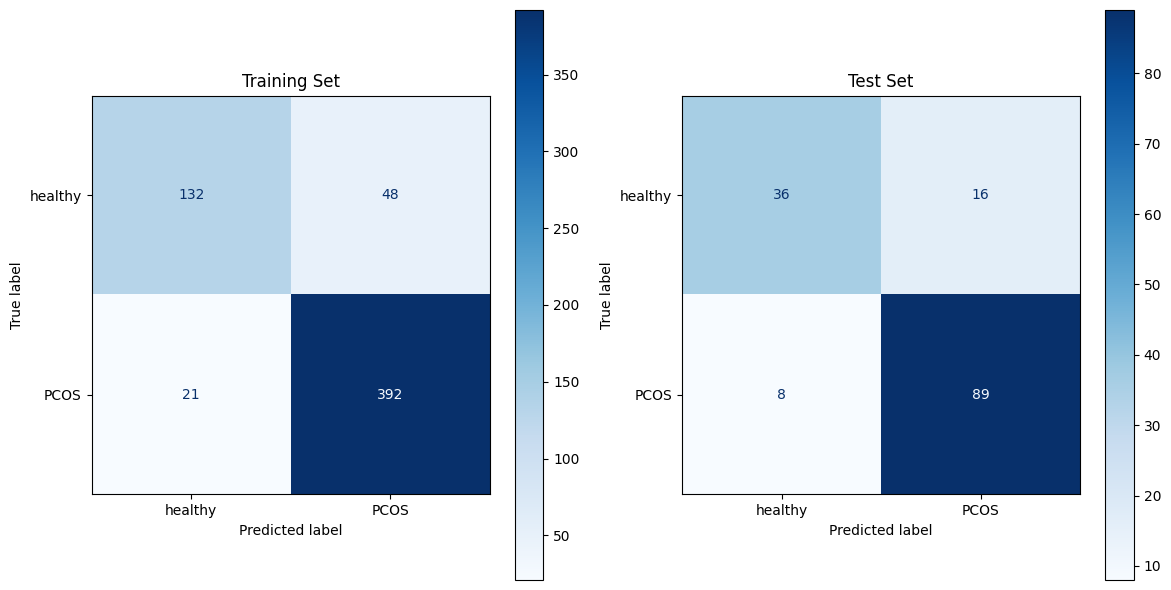

Training set
              precision    recall  f1-score   support

     healthy       0.86      0.73      0.79       180
        PCOS       0.89      0.95      0.92       413

    accuracy                           0.88       593
   macro avg       0.88      0.84      0.86       593
weighted avg       0.88      0.88      0.88       593

Test set
              precision    recall  f1-score   support

     healthy       0.82      0.69      0.75        52
        PCOS       0.85      0.92      0.88        97

    accuracy                           0.84       149
   macro avg       0.83      0.80      0.82       149
weighted avg       0.84      0.84      0.84       149



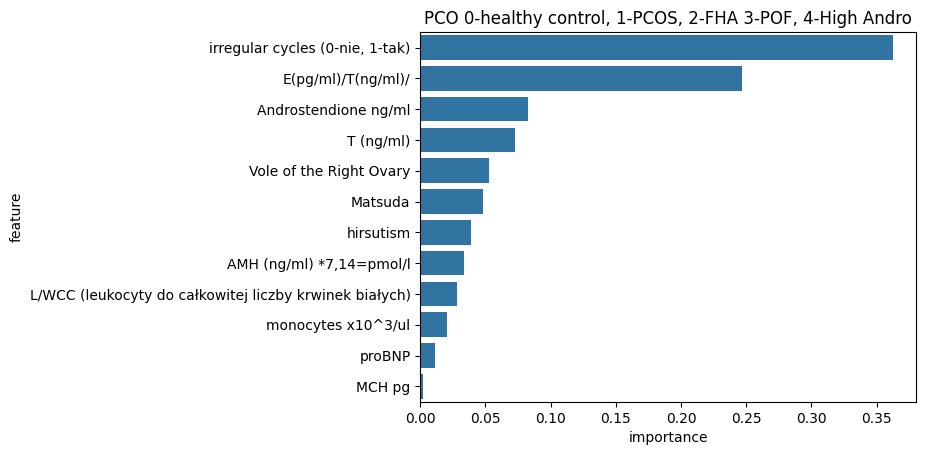

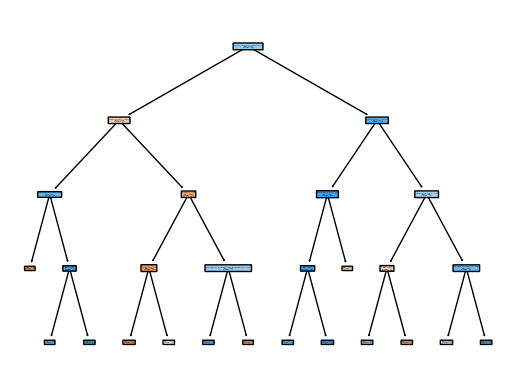

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


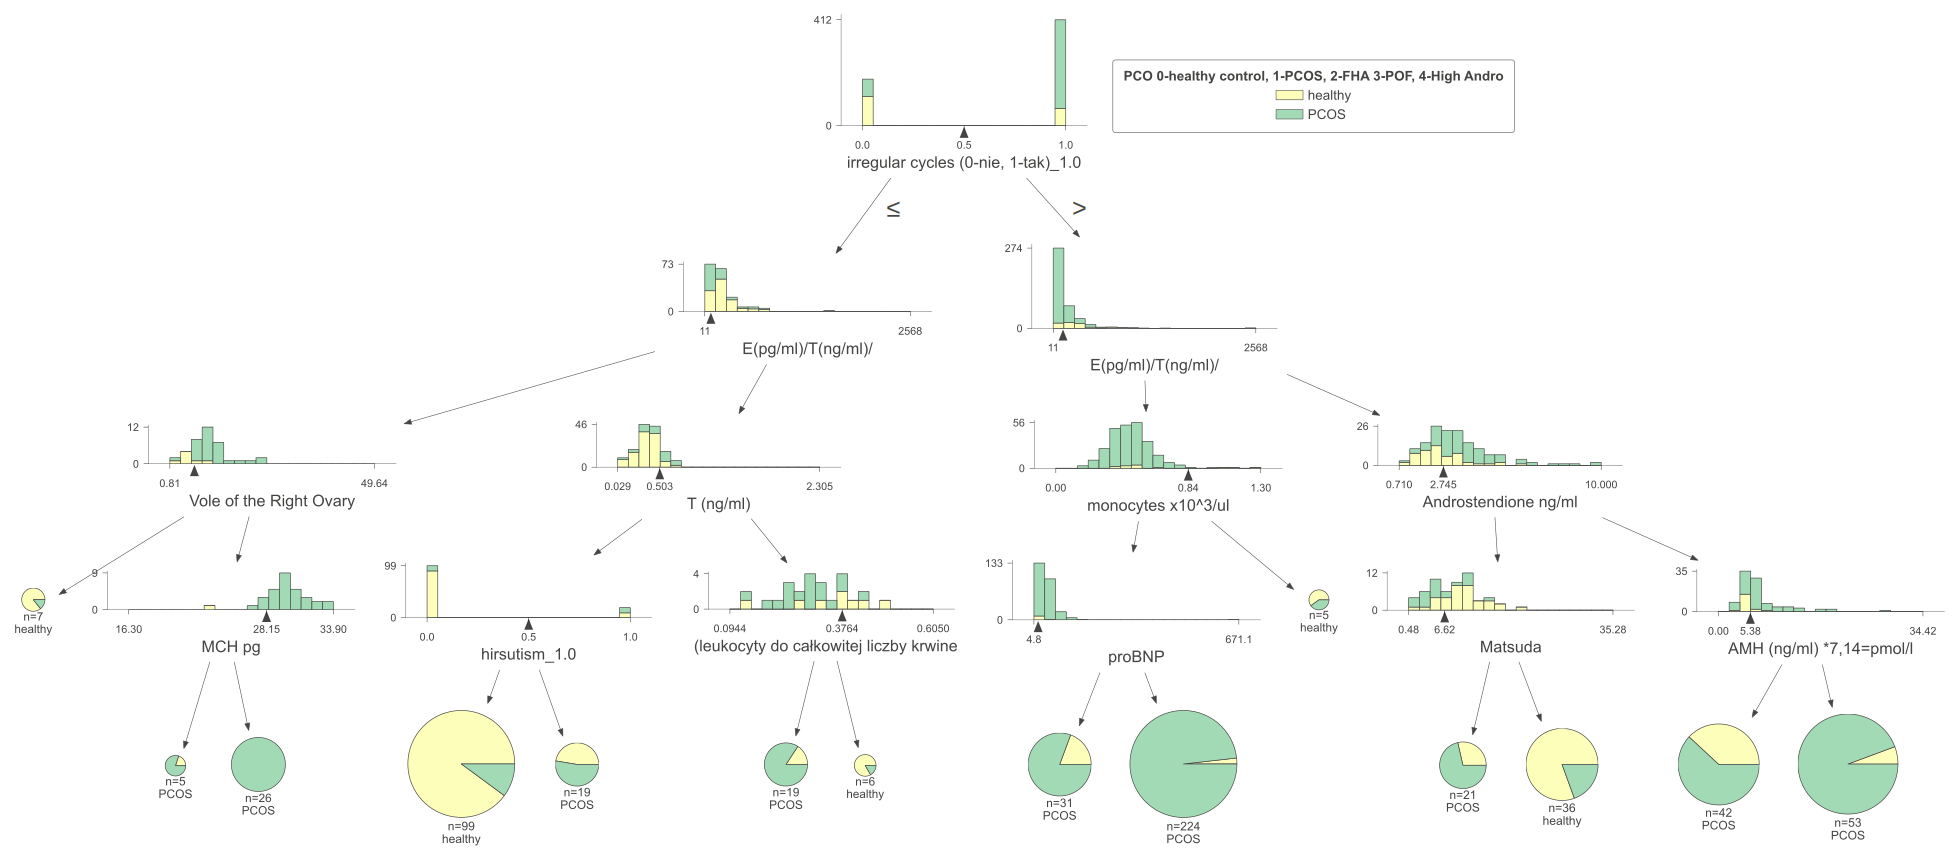

In [11]:
# Not SMOTE
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=5, min_samples_split=4, class_weight=None)

feature_importnces_tree, pipeline_tree = validate_model_classification(model_tree, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_tree)

plot_fancy_tree(pipeline_tree, X_train, y_train, PCO, CLASS_NAMES)

### RandomForest

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


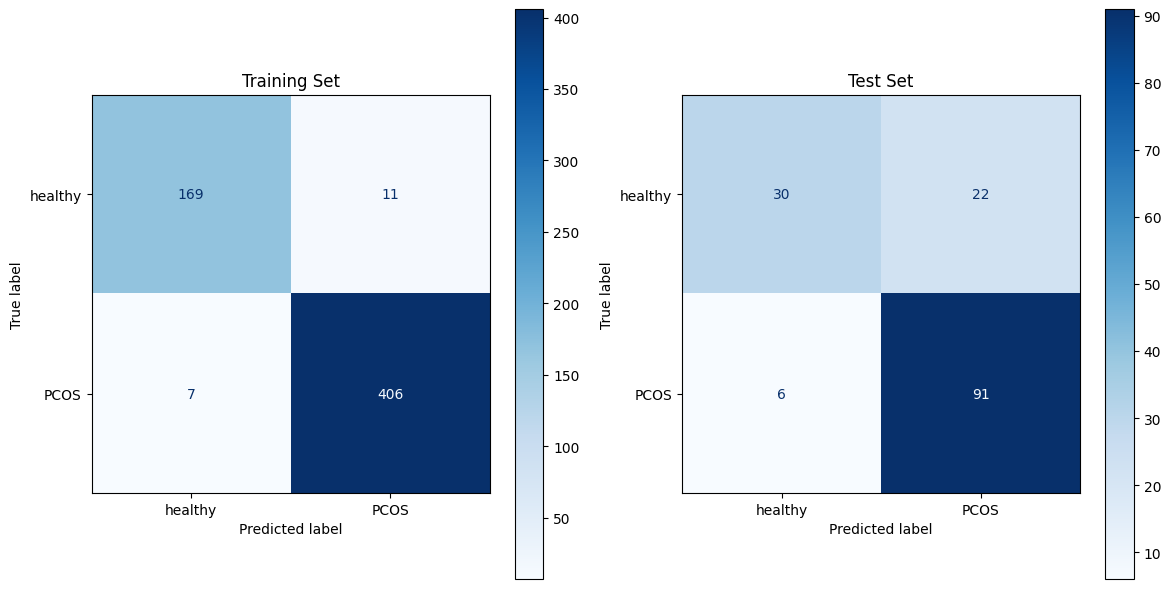

Training set
              precision    recall  f1-score   support

     healthy       0.96      0.94      0.95       180
        PCOS       0.97      0.98      0.98       413

    accuracy                           0.97       593
   macro avg       0.97      0.96      0.96       593
weighted avg       0.97      0.97      0.97       593

Test set
              precision    recall  f1-score   support

     healthy       0.83      0.58      0.68        52
        PCOS       0.81      0.94      0.87        97

    accuracy                           0.81       149
   macro avg       0.82      0.76      0.77       149
weighted avg       0.82      0.81      0.80       149



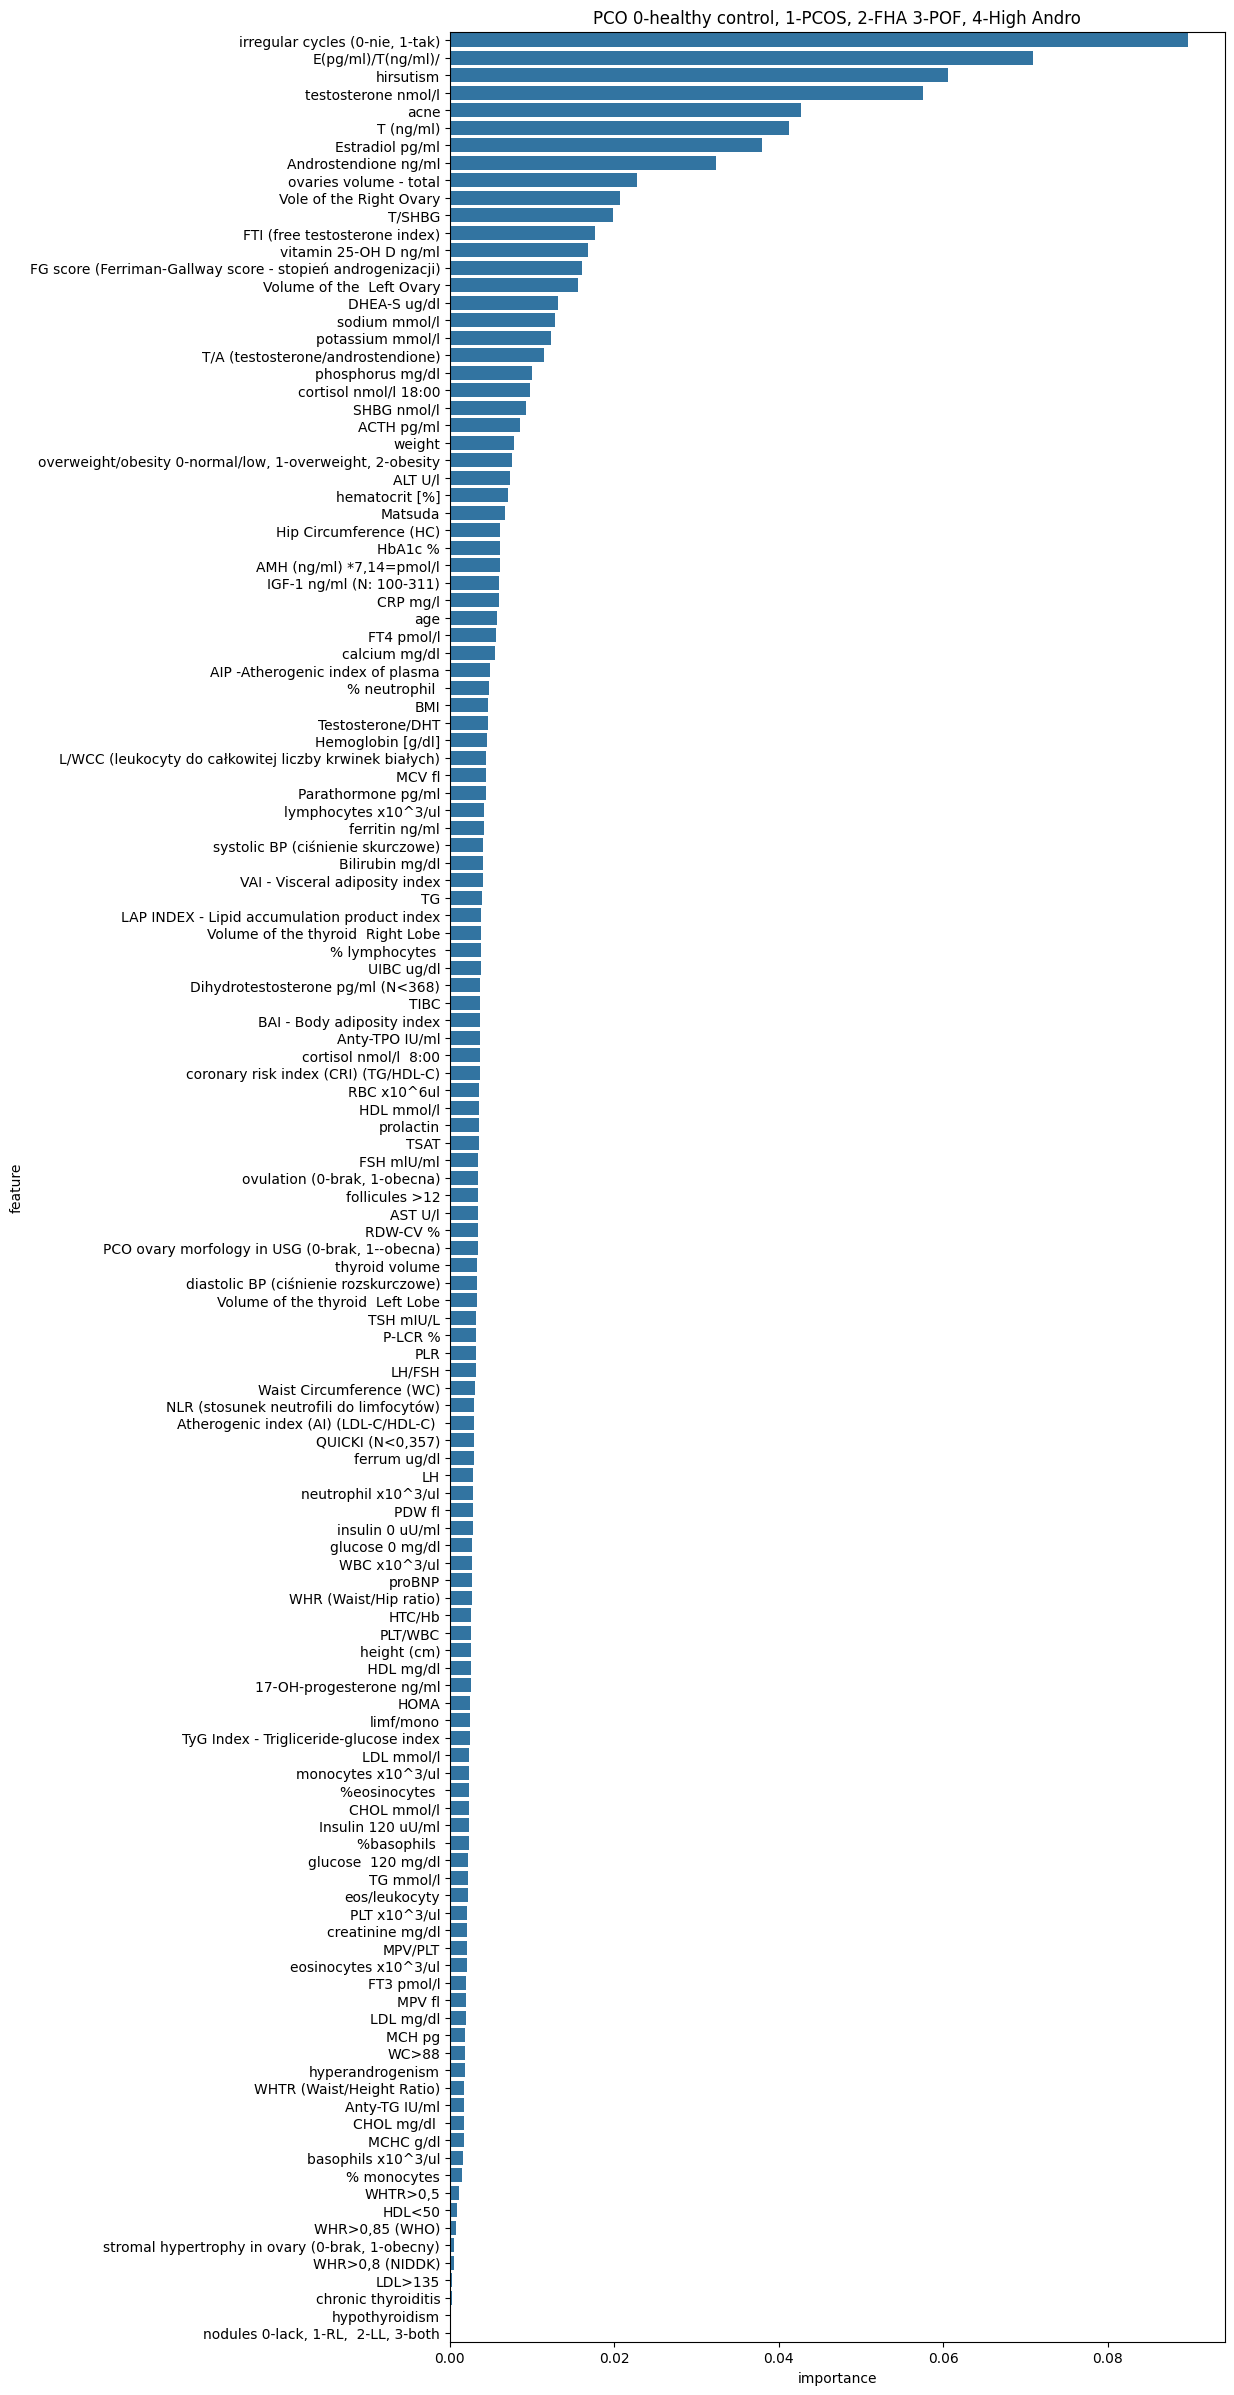

In [12]:
#  SMOTE
model_rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample', random_state=72)

feature_importnces_rf, pipeline_rf = validate_model_classification_smote(model_rf, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_imputer_tree_pipeline, categorical_imputer_pipeline, get_feature_importance_rf)

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


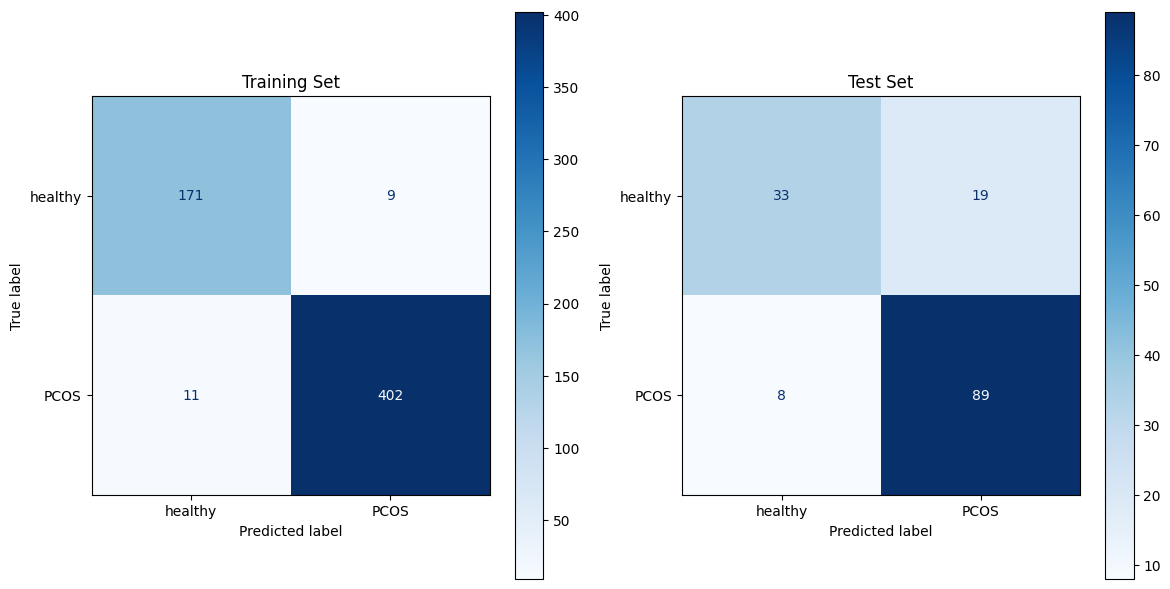

Training set
              precision    recall  f1-score   support

     healthy       0.94      0.95      0.94       180
        PCOS       0.98      0.97      0.98       413

    accuracy                           0.97       593
   macro avg       0.96      0.96      0.96       593
weighted avg       0.97      0.97      0.97       593

Test set
              precision    recall  f1-score   support

     healthy       0.80      0.63      0.71        52
        PCOS       0.82      0.92      0.87        97

    accuracy                           0.82       149
   macro avg       0.81      0.78      0.79       149
weighted avg       0.82      0.82      0.81       149



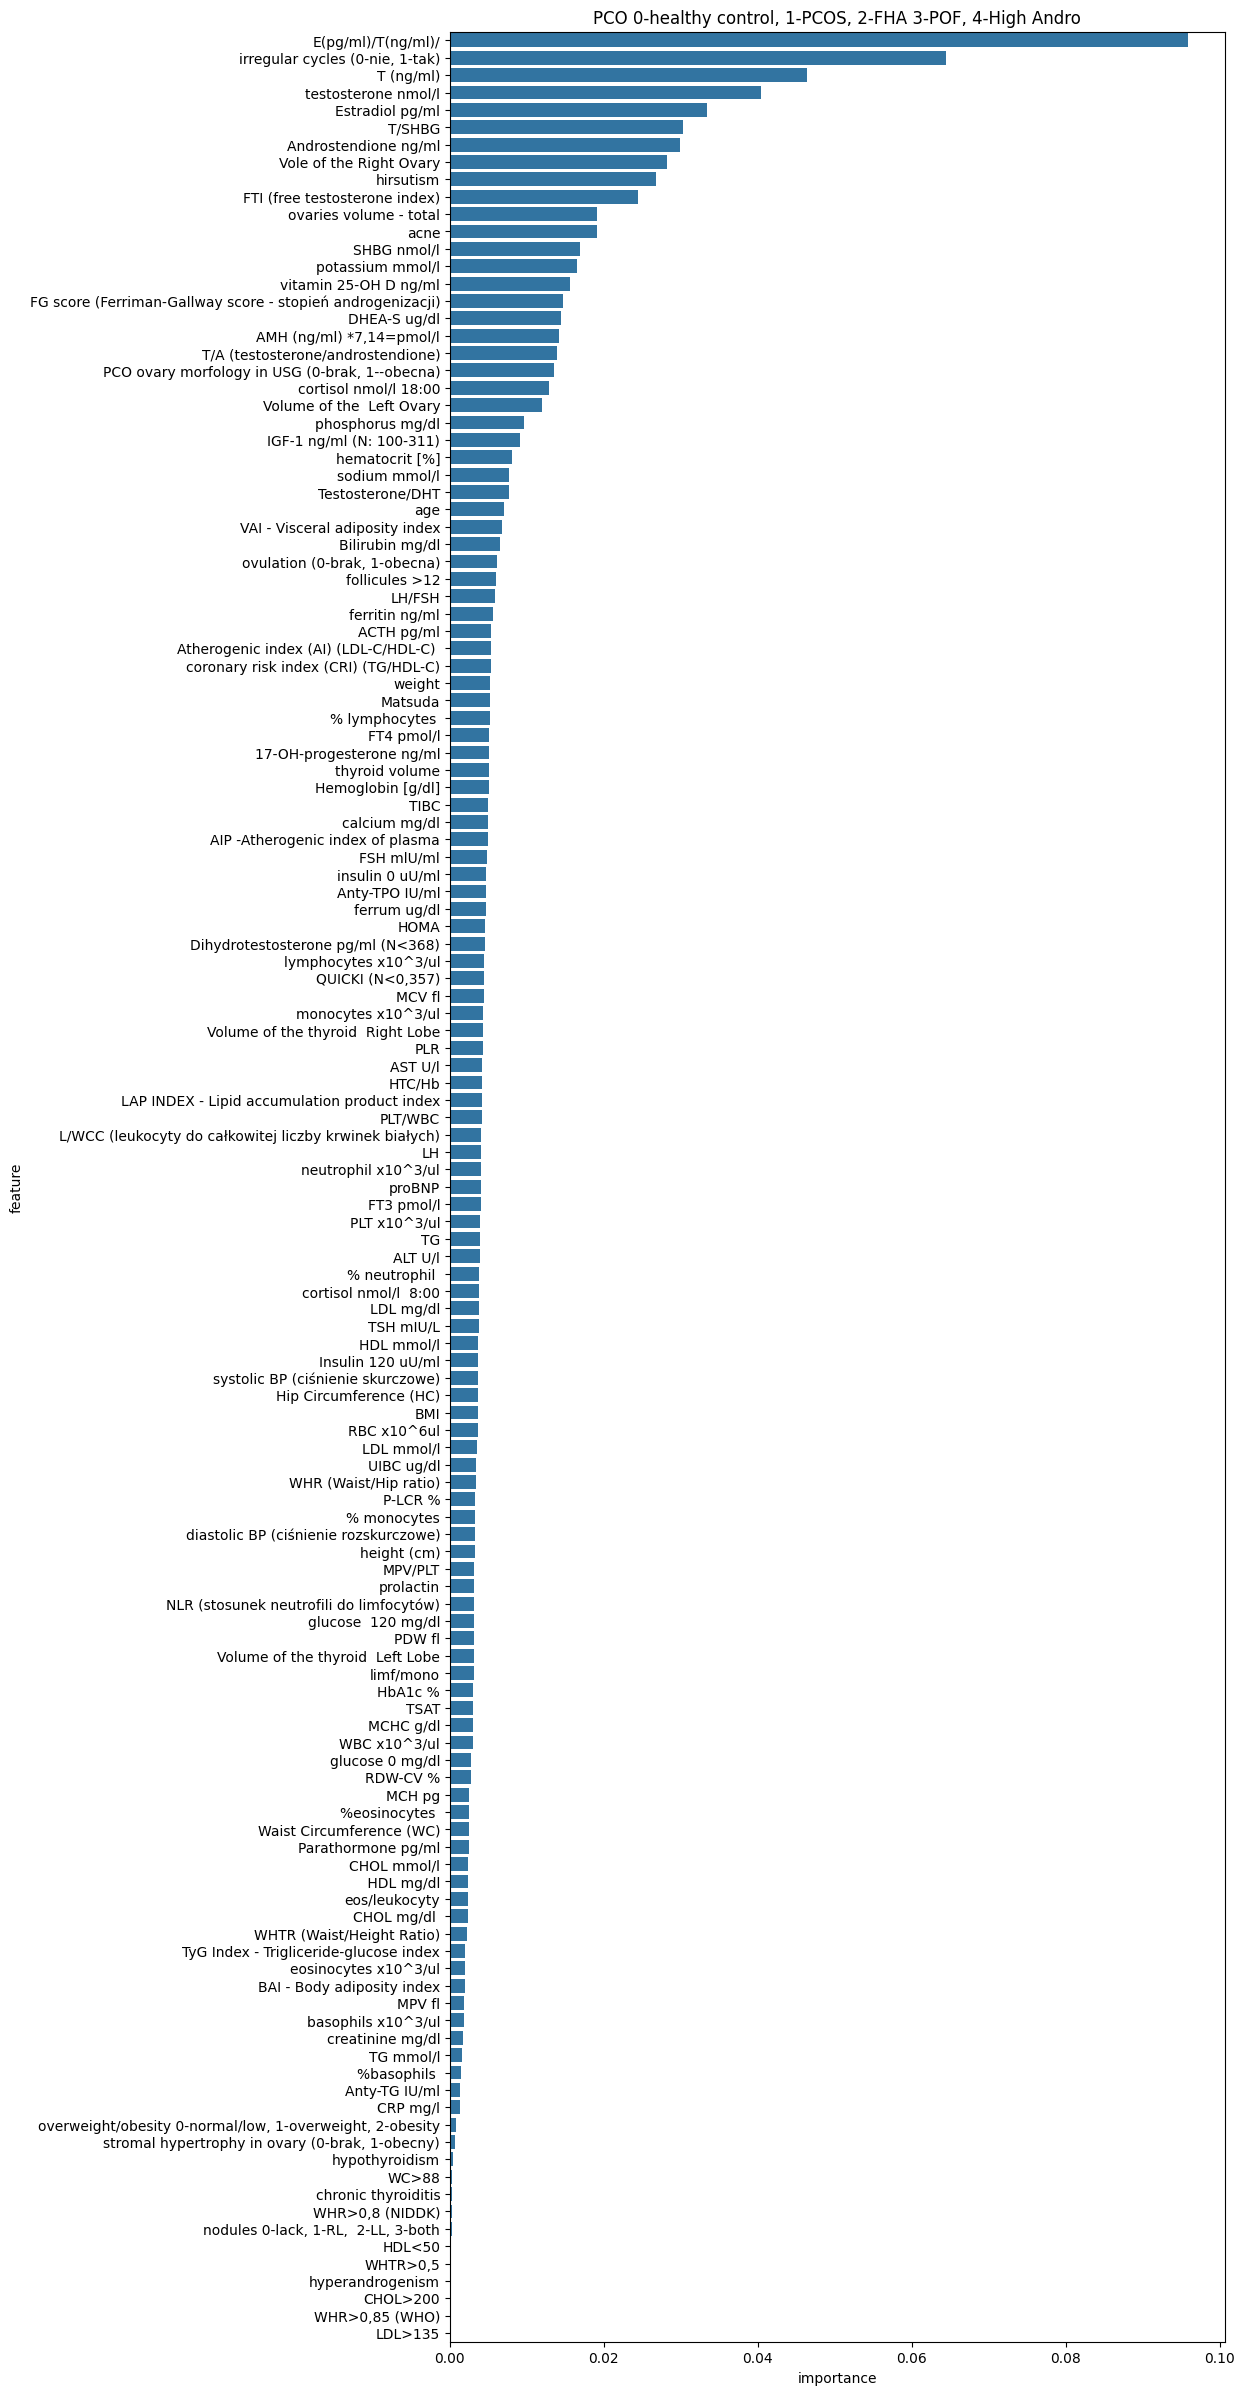

In [13]:
model_rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample', random_state=72)

feature_importnces_rf, pipeline_rf = validate_model_classification(model_rf, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_rf)

### Logistic Regression

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


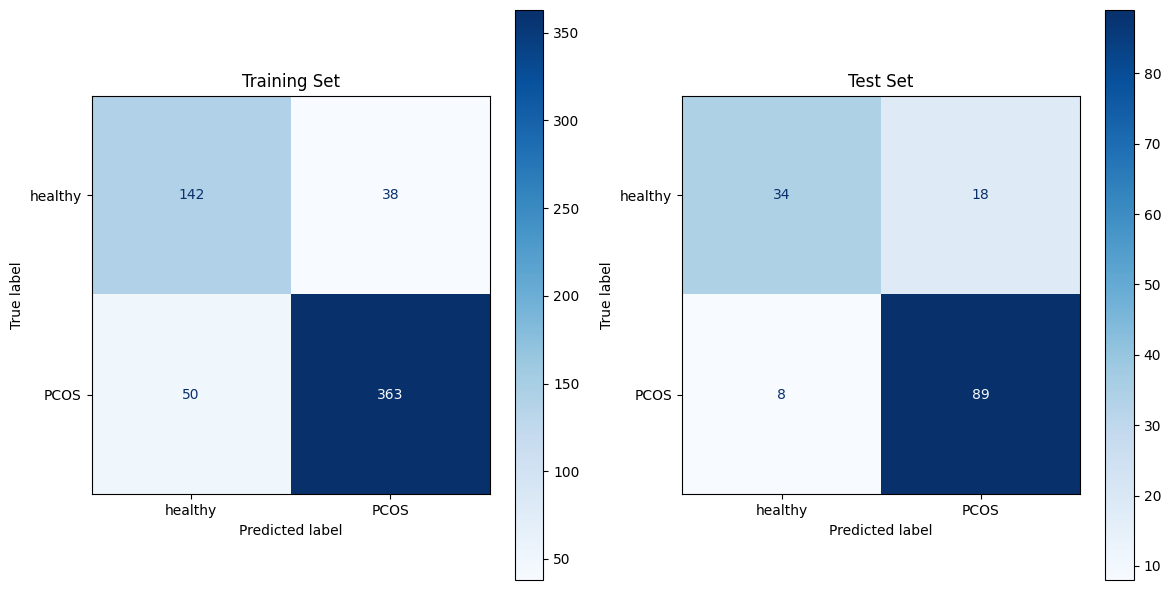

Training set
              precision    recall  f1-score   support

     healthy       0.74      0.79      0.76       180
        PCOS       0.91      0.88      0.89       413

    accuracy                           0.85       593
   macro avg       0.82      0.83      0.83       593
weighted avg       0.85      0.85      0.85       593

Test set
              precision    recall  f1-score   support

     healthy       0.81      0.65      0.72        52
        PCOS       0.83      0.92      0.87        97

    accuracy                           0.83       149
   macro avg       0.82      0.79      0.80       149
weighted avg       0.82      0.83      0.82       149



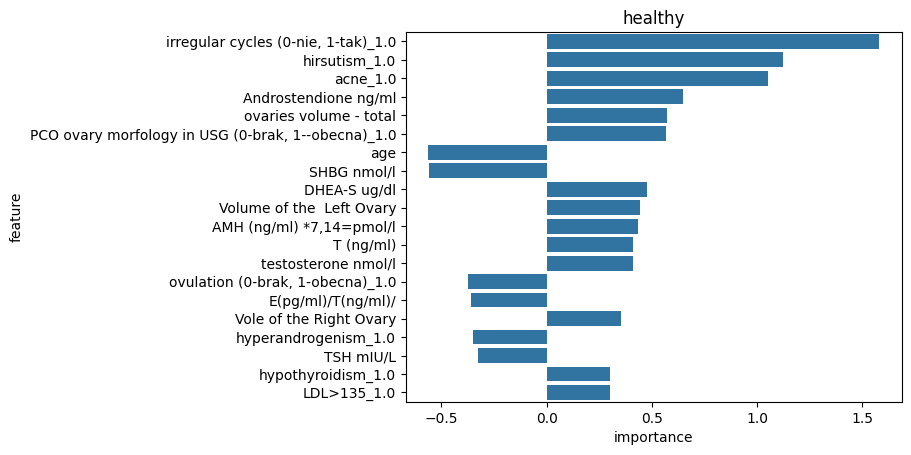

In [14]:
#  SMOTE
model_lr = LogisticRegression(C=0.1, max_iter=100000, n_jobs=-1)

feature_importnces_lr, pipeline_tlr = validate_model_classification_smote(model_lr, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_imputer_pipeline, categorical_imputer_pipeline, get_feature_importance_logistic_regressison)

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


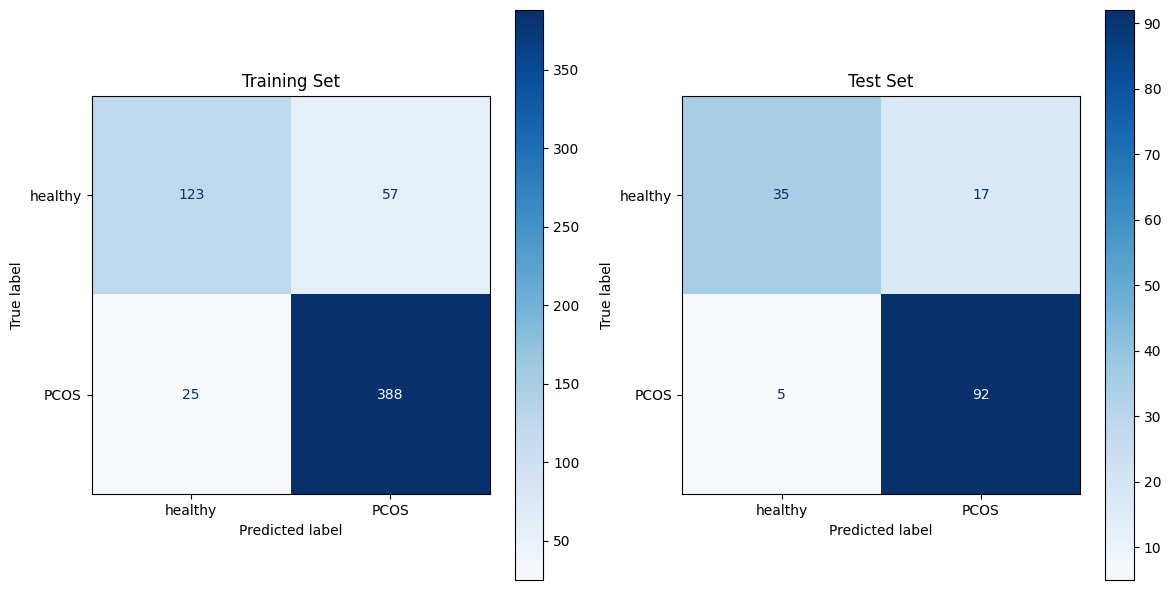

Training set
              precision    recall  f1-score   support

     healthy       0.83      0.68      0.75       180
        PCOS       0.87      0.94      0.90       413

    accuracy                           0.86       593
   macro avg       0.85      0.81      0.83       593
weighted avg       0.86      0.86      0.86       593

Test set
              precision    recall  f1-score   support

     healthy       0.88      0.67      0.76        52
        PCOS       0.84      0.95      0.89        97

    accuracy                           0.85       149
   macro avg       0.86      0.81      0.83       149
weighted avg       0.85      0.85      0.85       149



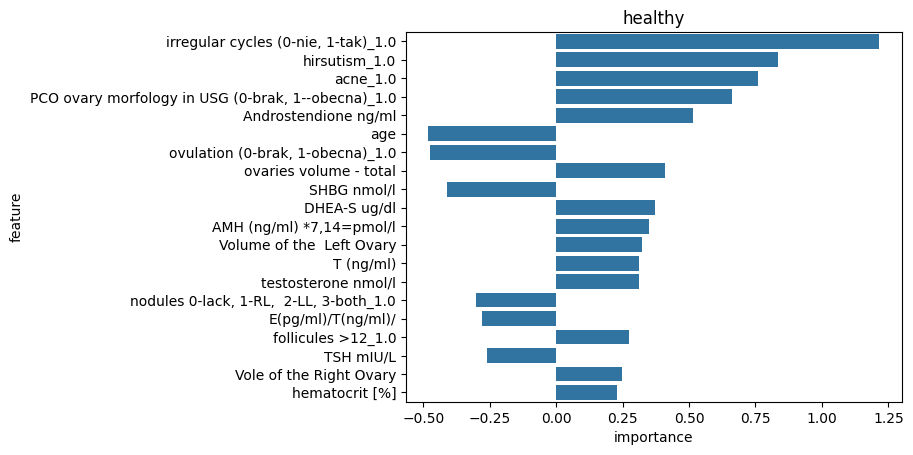

In [15]:
model_lr = LogisticRegression(C=0.1, max_iter=100000, n_jobs=-1)

feature_importnces_lr, pipeline_tlr = validate_model_classification(model_lr, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor, categorical_preprocessor, get_feature_importance_logistic_regressison)

## Feature importance

In [16]:
selected_features_map = {}

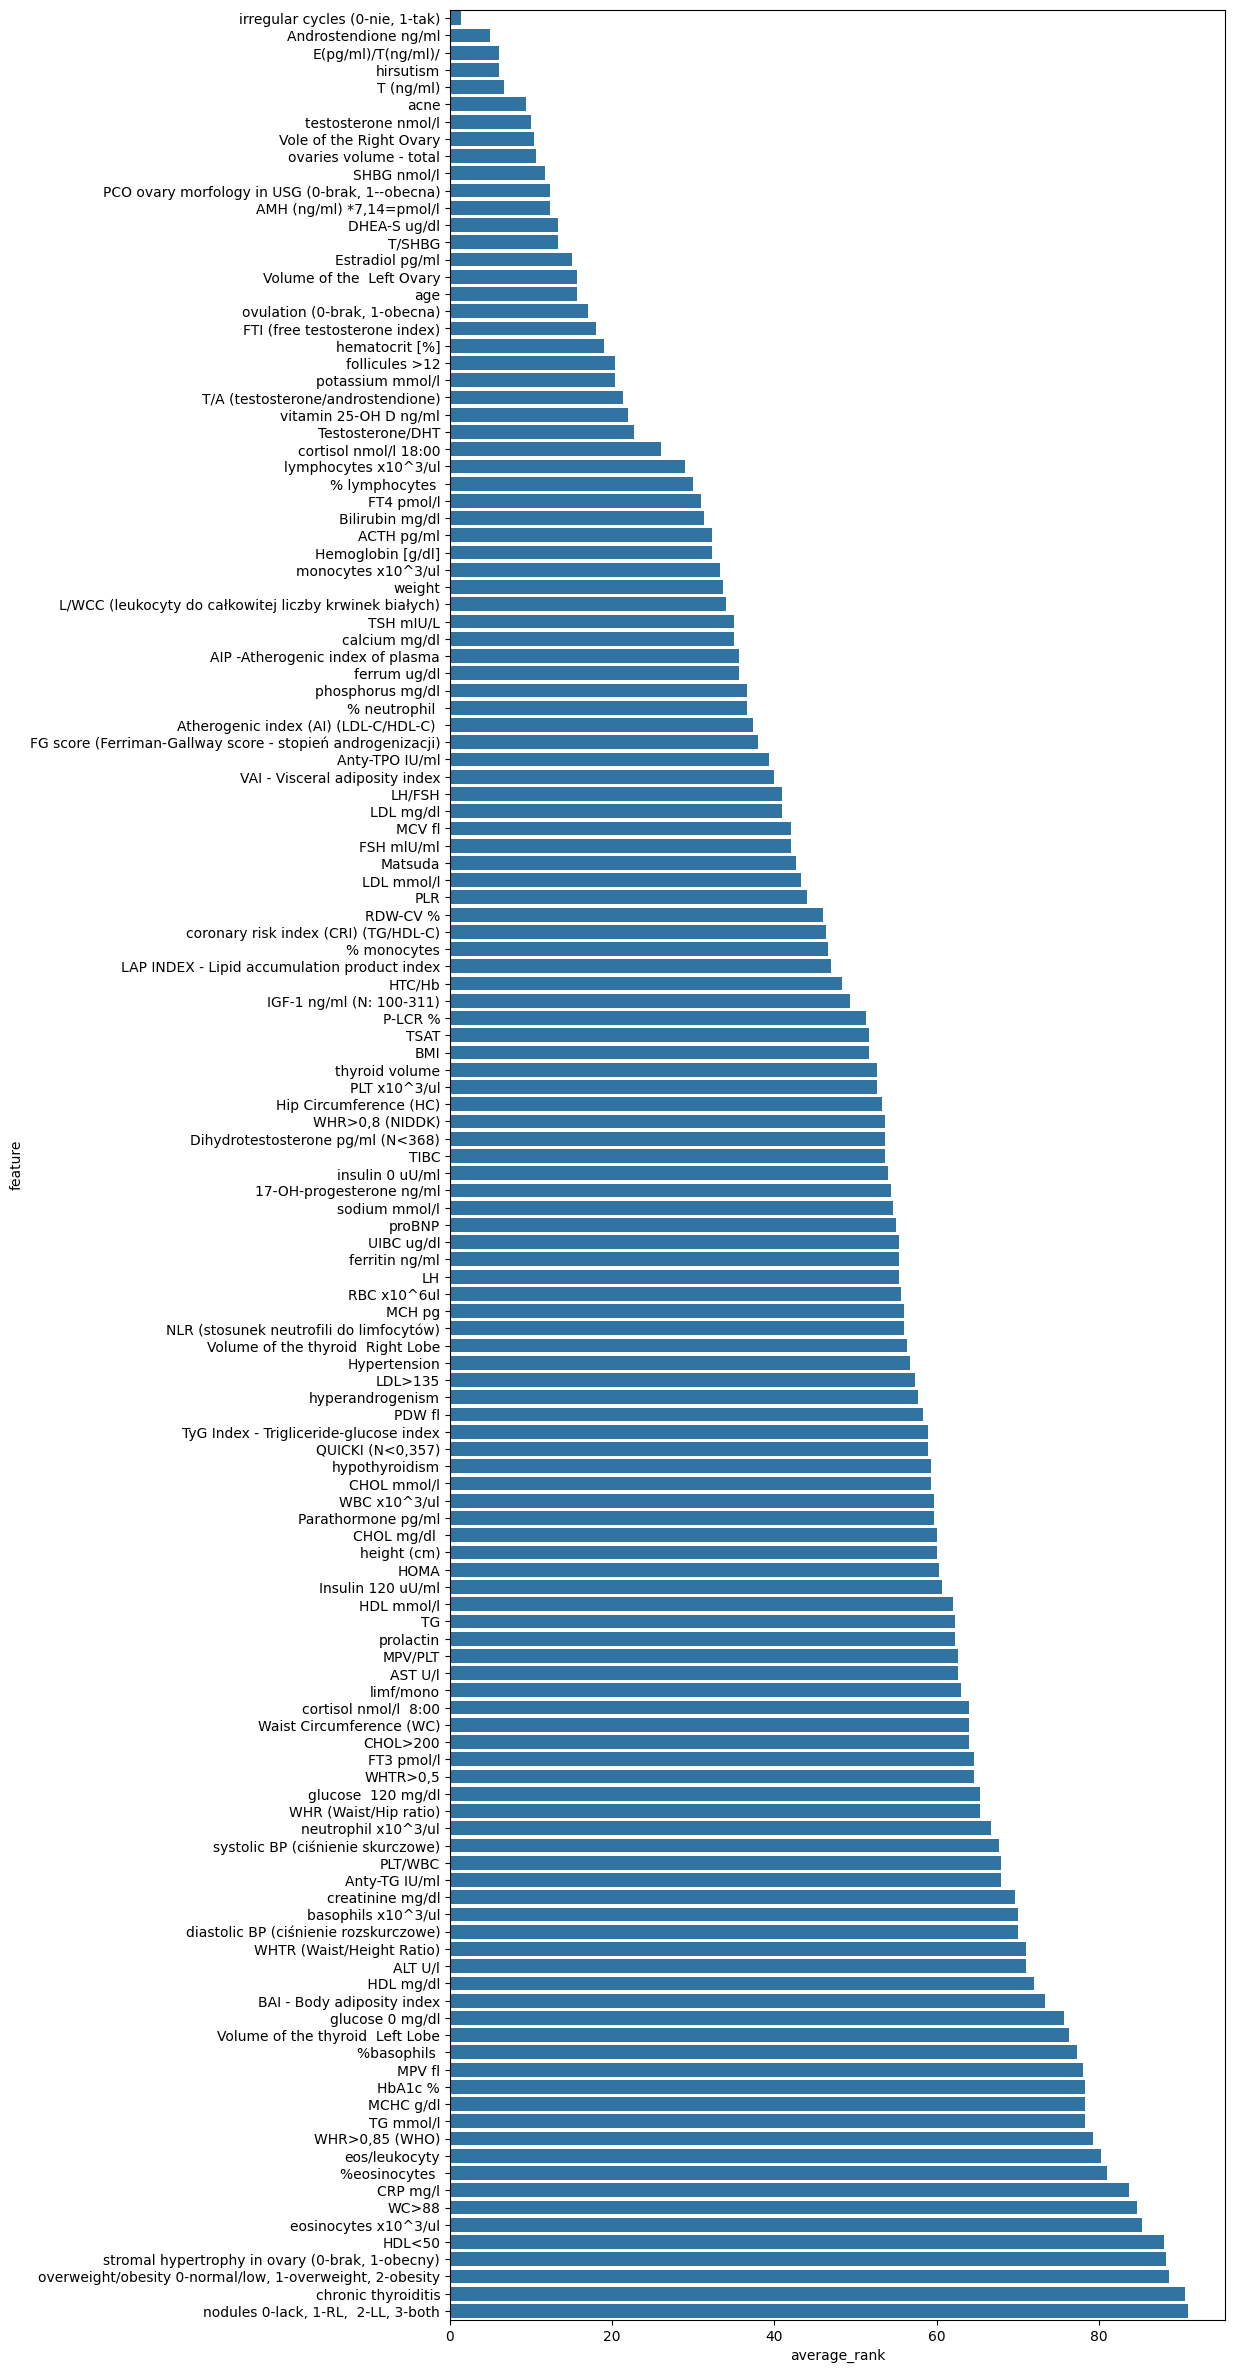

In [17]:
rename_importnace_col(feature_importnces_lr, 'logistic regression')
rename_importnace_col(feature_importnces_tree, 'tree')
rename_importnace_col(feature_importnces_rf, 'random forest')

feature_importance_df = merge_feature_importances([feature_importnces_lr, feature_importnces_tree, feature_importnces_rf])
ranked_df = rank_importances(feature_importance_df)

ranked_df_sorted = ranked_df.sort_values(by='average_rank')


plt.figure(figsize=(10, 30))
sns.barplot(ranked_df_sorted, x="average_rank", y="feature")
plt.show()

In [18]:
overall_rank_top_features = ranked_df_sorted[ranked_df_sorted['average_rank'] < 50] # a cut found on the plot above
overall_rank_selected_features = list(overall_rank_top_features['feature'].values)

selected_features_map['average_rank'] = overall_rank_selected_features
print(f'Top {len(overall_rank_selected_features)} features:')
overall_rank_selected_features

Top 58 features:


['irregular cycles (0-nie, 1-tak)',
 'Androstendione ng/ml',
 'E(pg/ml)/T(ng/ml)/',
 'hirsutism',
 'T (ng/ml)',
 'acne',
 'testosterone nmol/l',
 'Vole of the Right Ovary',
 'ovaries volume - total',
 'SHBG nmol/l',
 'PCO ovary morfology in USG (0-brak, 1--obecna)',
 'AMH (ng/ml) *7,14=pmol/l',
 'DHEA-S ug/dl',
 'T/SHBG',
 'Estradiol pg/ml',
 'Volume of the  Left Ovary',
 'age',
 'ovulation (0-brak, 1-obecna)',
 'FTI (free testosterone index)',
 'hematocrit [%]',
 'follicules >12',
 'potassium mmol/l',
 'T/A (testosterone/androstendione)',
 'vitamin 25-OH D ng/ml',
 'Testosterone/DHT',
 'cortisol nmol/l 18:00',
 'lymphocytes x10^3/ul',
 '% lymphocytes ',
 'FT4 pmol/l',
 'Bilirubin mg/dl',
 'ACTH pg/ml',
 'Hemoglobin [g/dl]',
 'monocytes x10^3/ul',
 'weight',
 'L/WCC (leukocyty do całkowitej liczby krwinek białych)',
 'TSH mIU/L',
 'calcium mg/dl',
 'AIP -Atherogenic index of plasma',
 'ferrum ug/dl',
 'phosphorus mg/dl',
 '% neutrophil ',
 'Atherogenic index (AI) (LDL-C/HDL-C) ',
 'FG 

## Feature selection

### Chi 2

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


Selected 15 features


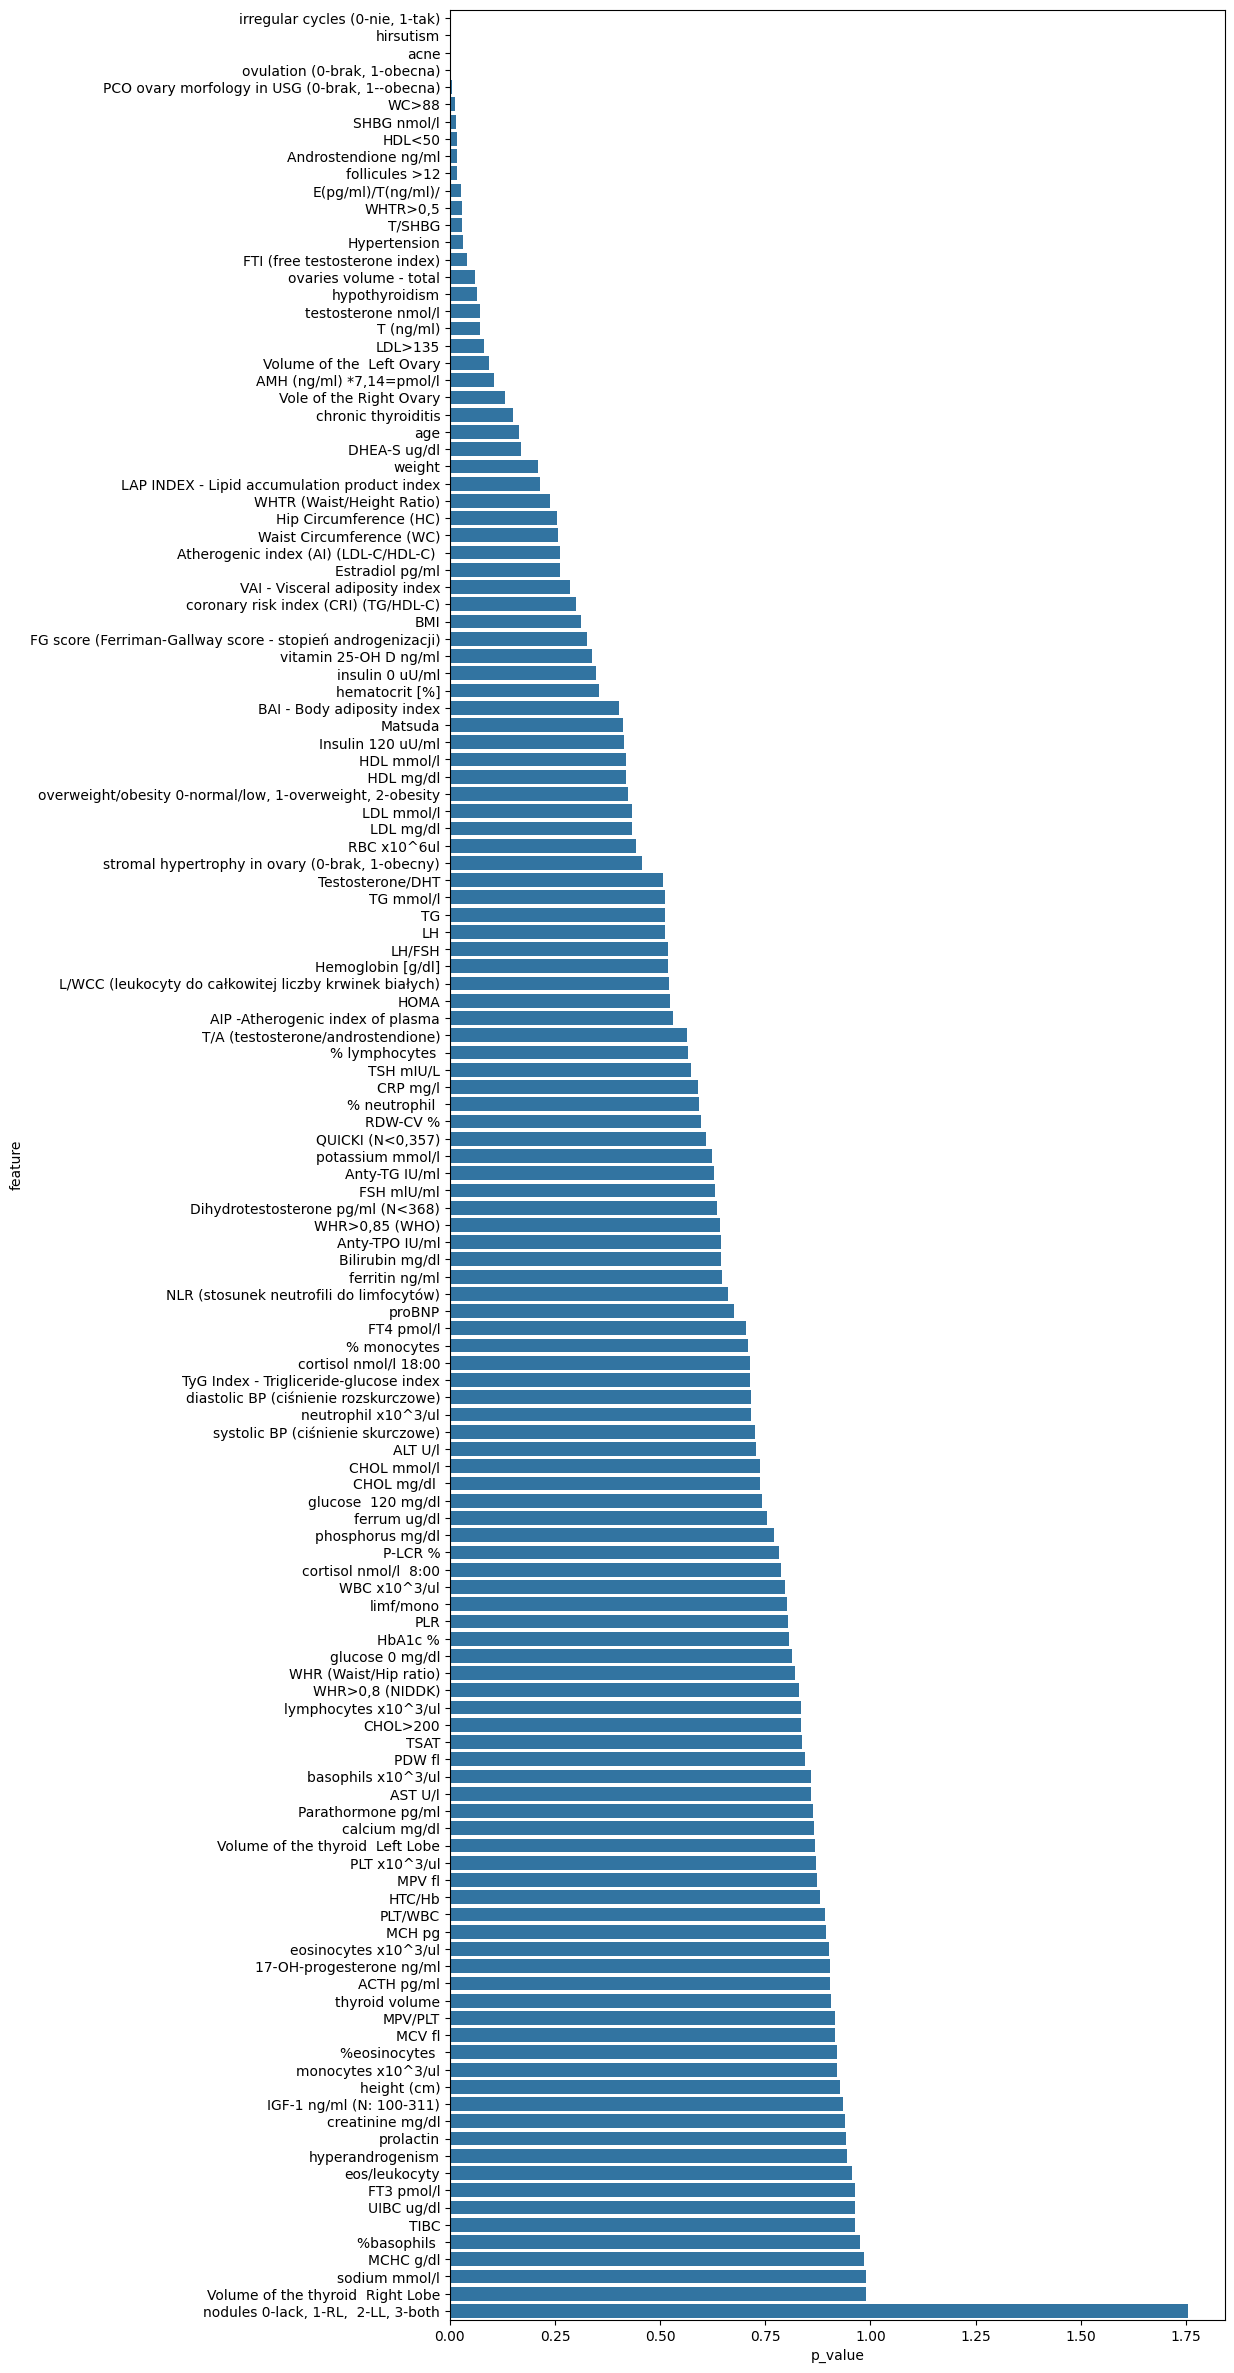

['irregular cycles (0-nie, 1-tak)',
 'hirsutism',
 'acne',
 'ovulation (0-brak, 1-obecna)',
 'PCO ovary morfology in USG (0-brak, 1--obecna)',
 'WC>88',
 'SHBG nmol/l',
 'HDL<50',
 'Androstendione ng/ml',
 'follicules >12',
 'E(pg/ml)/T(ng/ml)/',
 'WHTR>0,5',
 'T/SHBG',
 'Hypertension',
 'FTI (free testosterone index)']

In [19]:
selected_features_chi2 = feature_selection_chi2(SelectKBest(chi2, k='all'), PCO, continuous_preprocessor, categorical_preprocessor, X_train, y_train)
selected_features_map['chi_2'] = selected_features_chi2
selected_features_chi2

### Mutual info

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


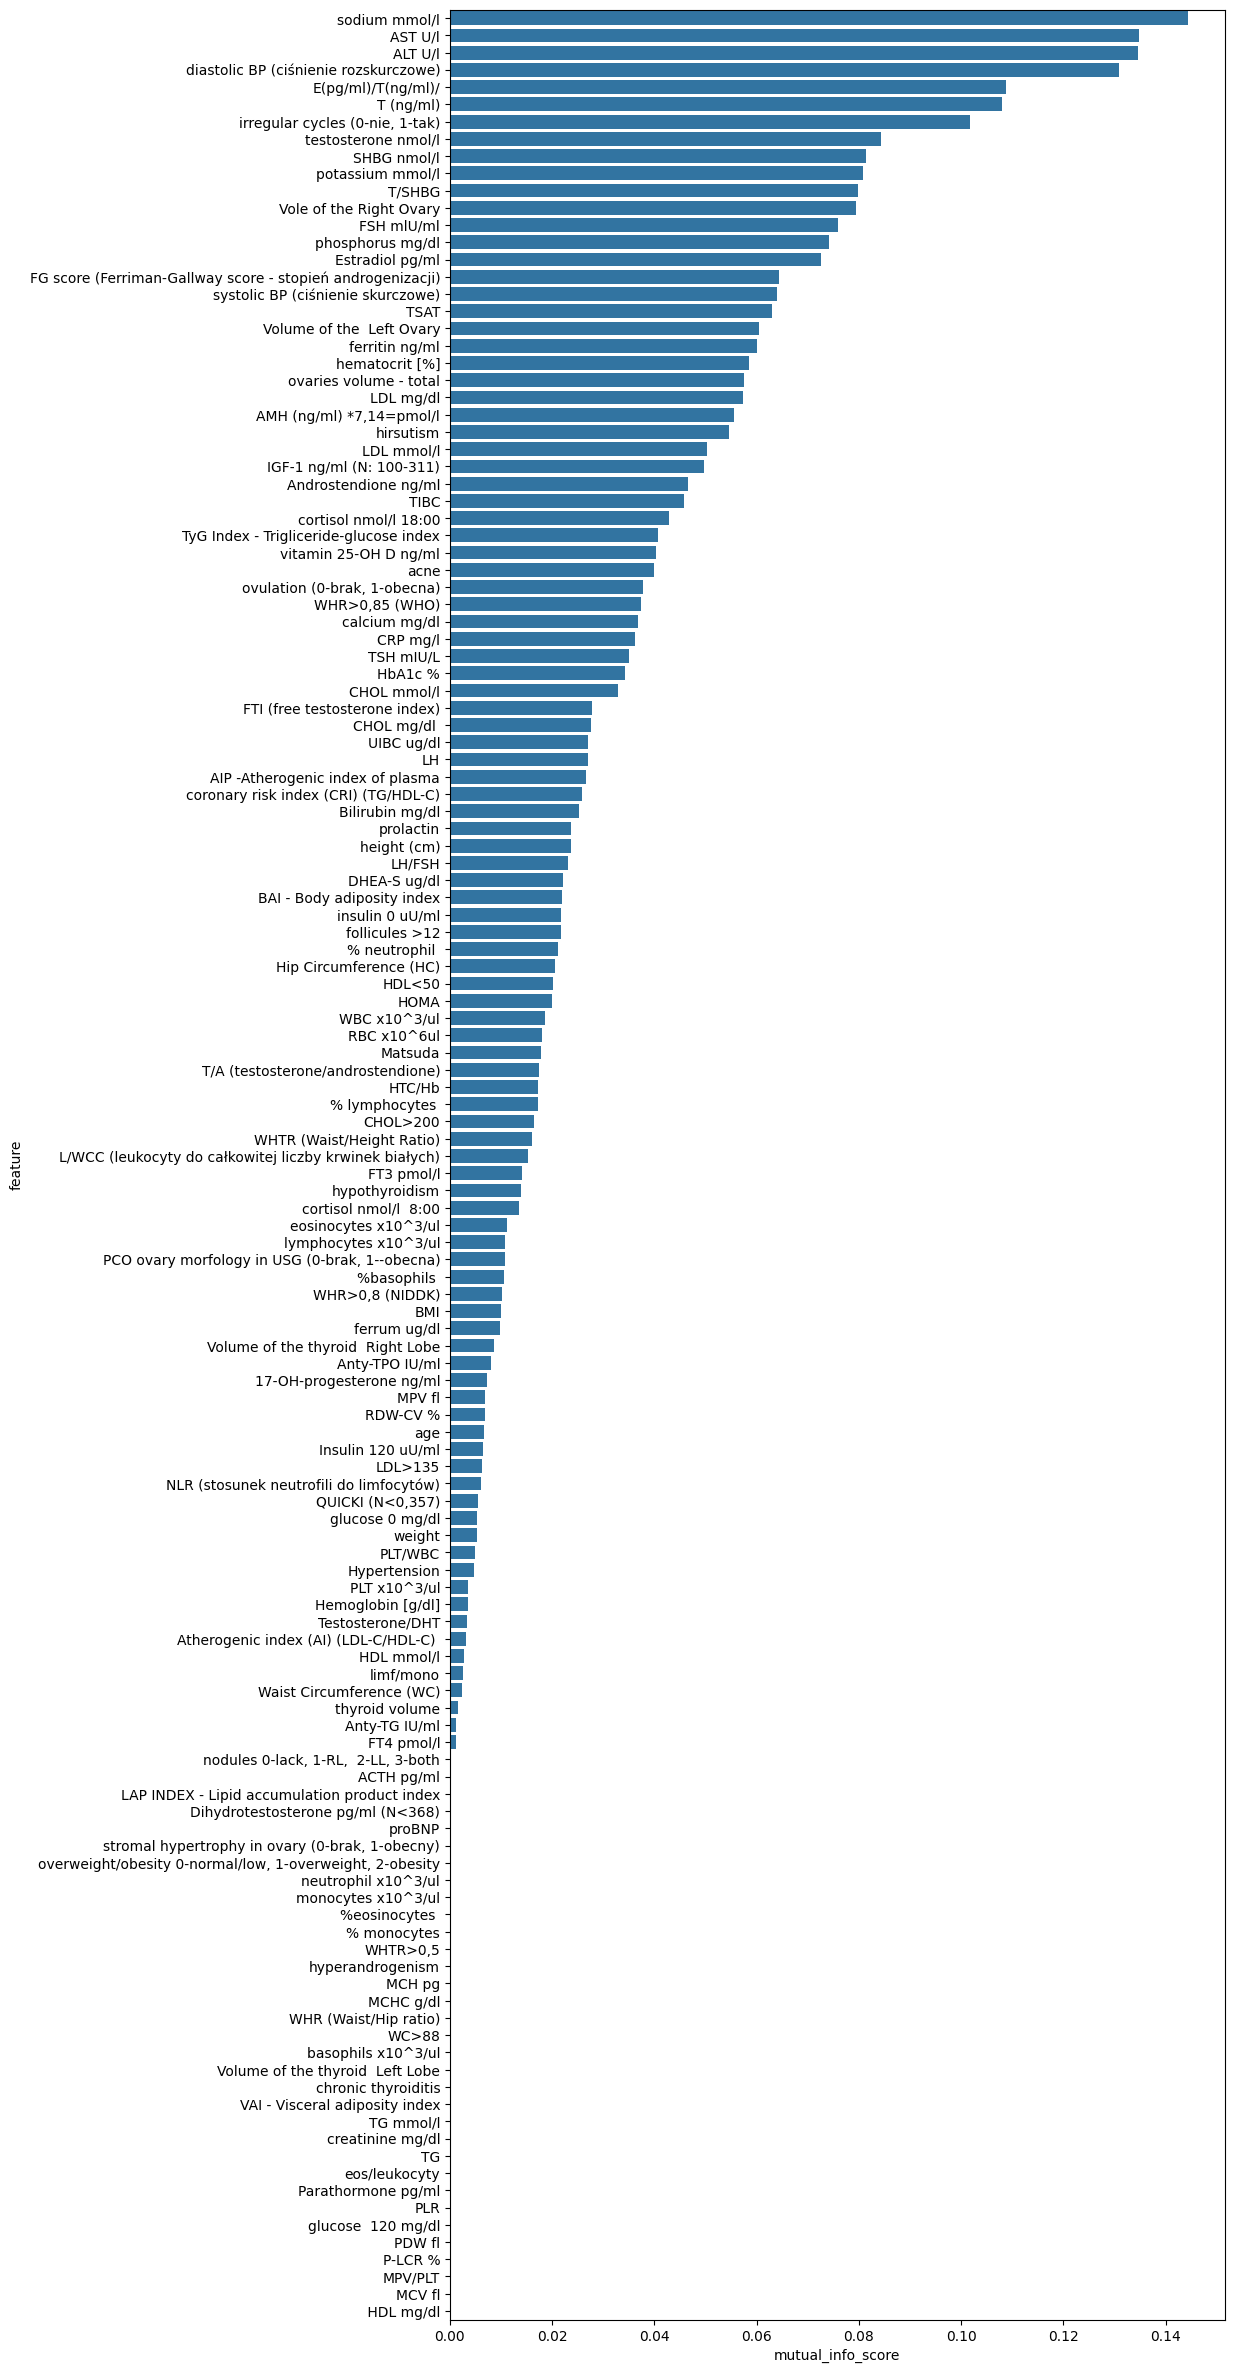

Selected 89 features


In [20]:
selected_feature_names_mutual_info = feature_selection_mutual_info_classification(X_train, y_train, PCO, continuous_preprocessor, categorical_preprocessor)
selected_feature_names_mutual_info = selected_feature_names_mutual_info[selected_feature_names_mutual_info['mutual_info_score'] > 0.005]

selected_feature_names_mutual_info.reset_index(drop=True, inplace=True)
print(f'Selected {len(selected_feature_names_mutual_info)} features')
selected_features_map['mutual_info'] = list(selected_feature_names_mutual_info['feature'].values)
# selected_feature_names_mutual_info

### Recursive Feature elimination

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


Optimal number of features: 69


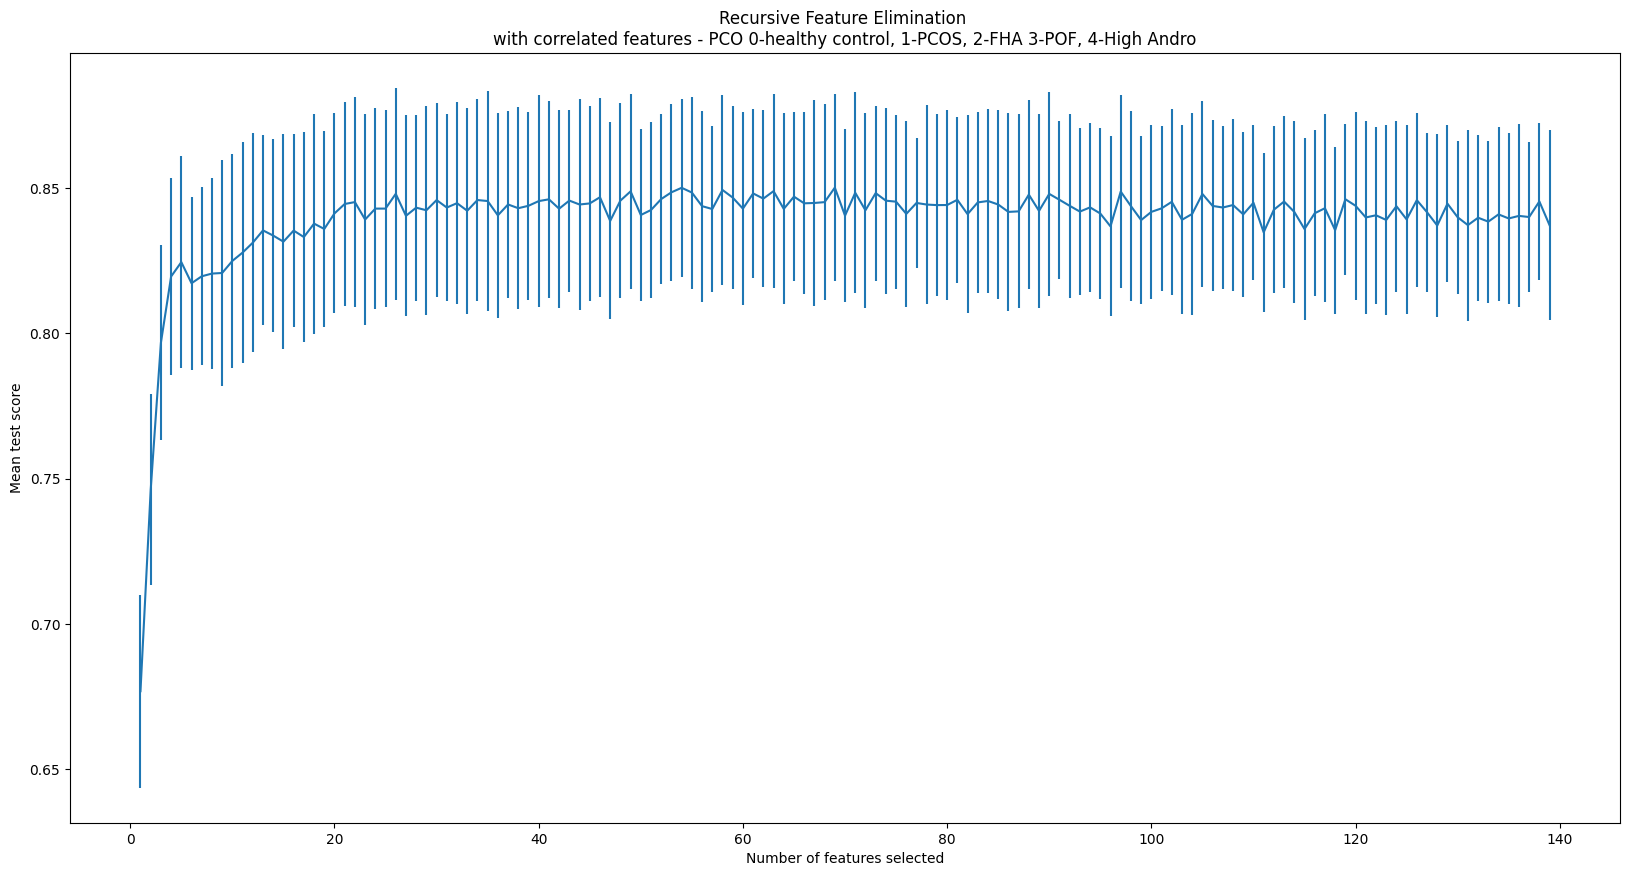

['SHBG nmol/l',
 'VAI - Visceral adiposity index',
 'UIBC ug/dl',
 'TyG Index - Trigliceride-glucose index',
 'Testosterone/DHT',
 'TSH mIU/L',
 'TSAT',
 'T/SHBG',
 'T/A (testosterone/androstendione)',
 'Vole of the Right Ovary',
 'T (ng/ml)',
 'Parathormone pg/ml',
 'PLT/WBC',
 'PLR',
 'PCO ovary morfology in USG (0-brak, 1--obecna)',
 'NLR (stosunek neutrofili do limfocytów)',
 'Matsuda',
 'MCV fl',
 'LH/FSH',
 'vitamin 25-OH D ng/ml',
 'LH',
 'Volume of the  Left Ovary',
 'age',
 'testosterone nmol/l',
 'systolic BP (ciśnienie skurczowe)',
 'prolactin',
 'proBNP',
 'potassium mmol/l',
 'phosphorus mg/dl',
 'ovaries volume - total',
 'monocytes x10^3/ul',
 'acne',
 'lymphocytes x10^3/ul',
 'insulin 0 uU/ml',
 'hirsutism',
 'hematocrit [%]',
 'follicules >12',
 'cortisol nmol/l 18:00',
 'cortisol nmol/l  8:00',
 'coronary risk index (CRI) (TG/HDL-C)',
 'calcium mg/dl',
 'irregular cycles (0-nie, 1-tak)',
 'LAP INDEX - Lipid accumulation product index',
 'weight',
 'Androstendione ng/m

In [21]:
lasso_model = RandomForestClassifier(min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

recursive_feature_elimination_ranked_features_lasso = recursive_feature_elimination(X_train, y_train, lasso_model, PCO, continuous_preprocessor, categorical_preprocessor, scoring_metric='f1_weighted')
selected_features_map['recursive_feature_elimination'] = list(recursive_feature_elimination_ranked_features_lasso[recursive_feature_elimination_ranked_features_lasso['ranking'] == 1]['feature'].values)
selected_features_map['recursive_feature_elimination']

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


Selected 132 features


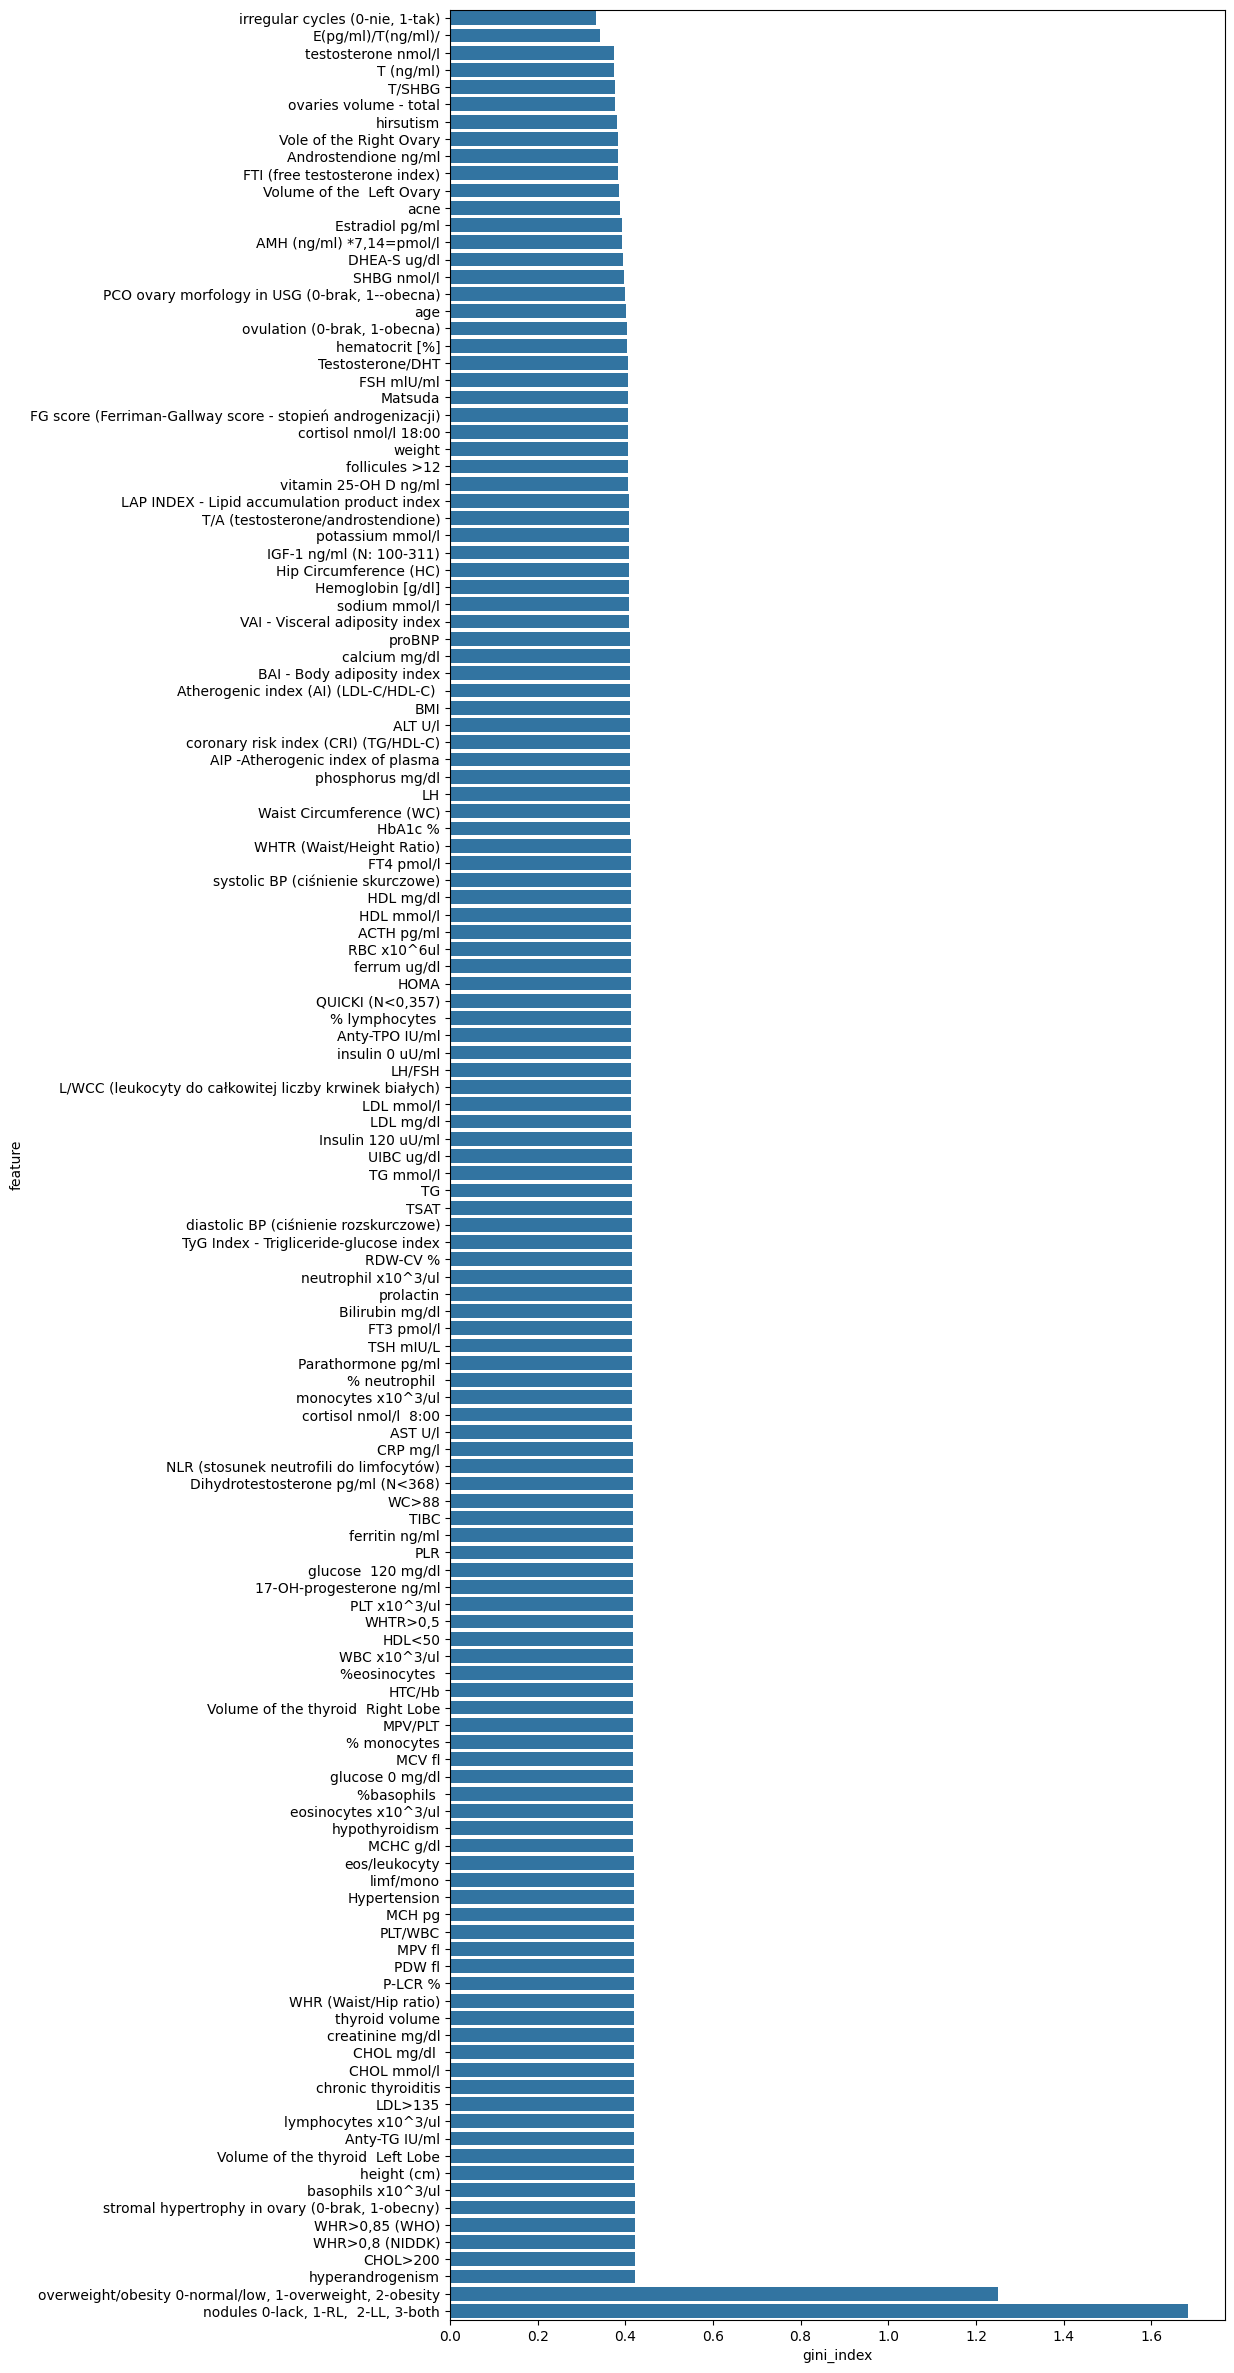

['irregular cycles (0-nie, 1-tak)',
 'E(pg/ml)/T(ng/ml)/',
 'testosterone nmol/l',
 'T (ng/ml)',
 'T/SHBG',
 'ovaries volume - total',
 'hirsutism',
 'Vole of the Right Ovary',
 'Androstendione ng/ml',
 'FTI (free testosterone index)',
 'Volume of the  Left Ovary',
 'acne',
 'Estradiol pg/ml',
 'AMH (ng/ml) *7,14=pmol/l',
 'DHEA-S ug/dl',
 'SHBG nmol/l',
 'PCO ovary morfology in USG (0-brak, 1--obecna)',
 'age',
 'ovulation (0-brak, 1-obecna)',
 'hematocrit [%]',
 'Testosterone/DHT',
 'FSH mlU/ml',
 'Matsuda',
 'FG score (Ferriman-Gallway score - stopień androgenizacji)',
 'cortisol nmol/l 18:00',
 'weight',
 'follicules >12',
 'vitamin 25-OH D ng/ml',
 'LAP INDEX - Lipid accumulation product index',
 'T/A (testosterone/androstendione)',
 'potassium mmol/l',
 'IGF-1 ng/ml (N: 100-311)',
 'Hip Circumference (HC)',
 'Hemoglobin [g/dl]',
 'sodium mmol/l',
 'VAI - Visceral adiposity index',
 'proBNP',
 'calcium mg/dl',
 'BAI - Body adiposity index',
 'Atherogenic index (AI) (LDL-C/HDL-C) '

In [22]:
threshold = 0.5
gini_index_selected_features = feature_selection_gini_index(PCO, continuous_preprocessor, categorical_preprocessor, X_train, y_train, threshold=threshold)

selected_features_map['permutation_importance'] = gini_index_selected_features
gini_index_selected_features

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


selected 131 features


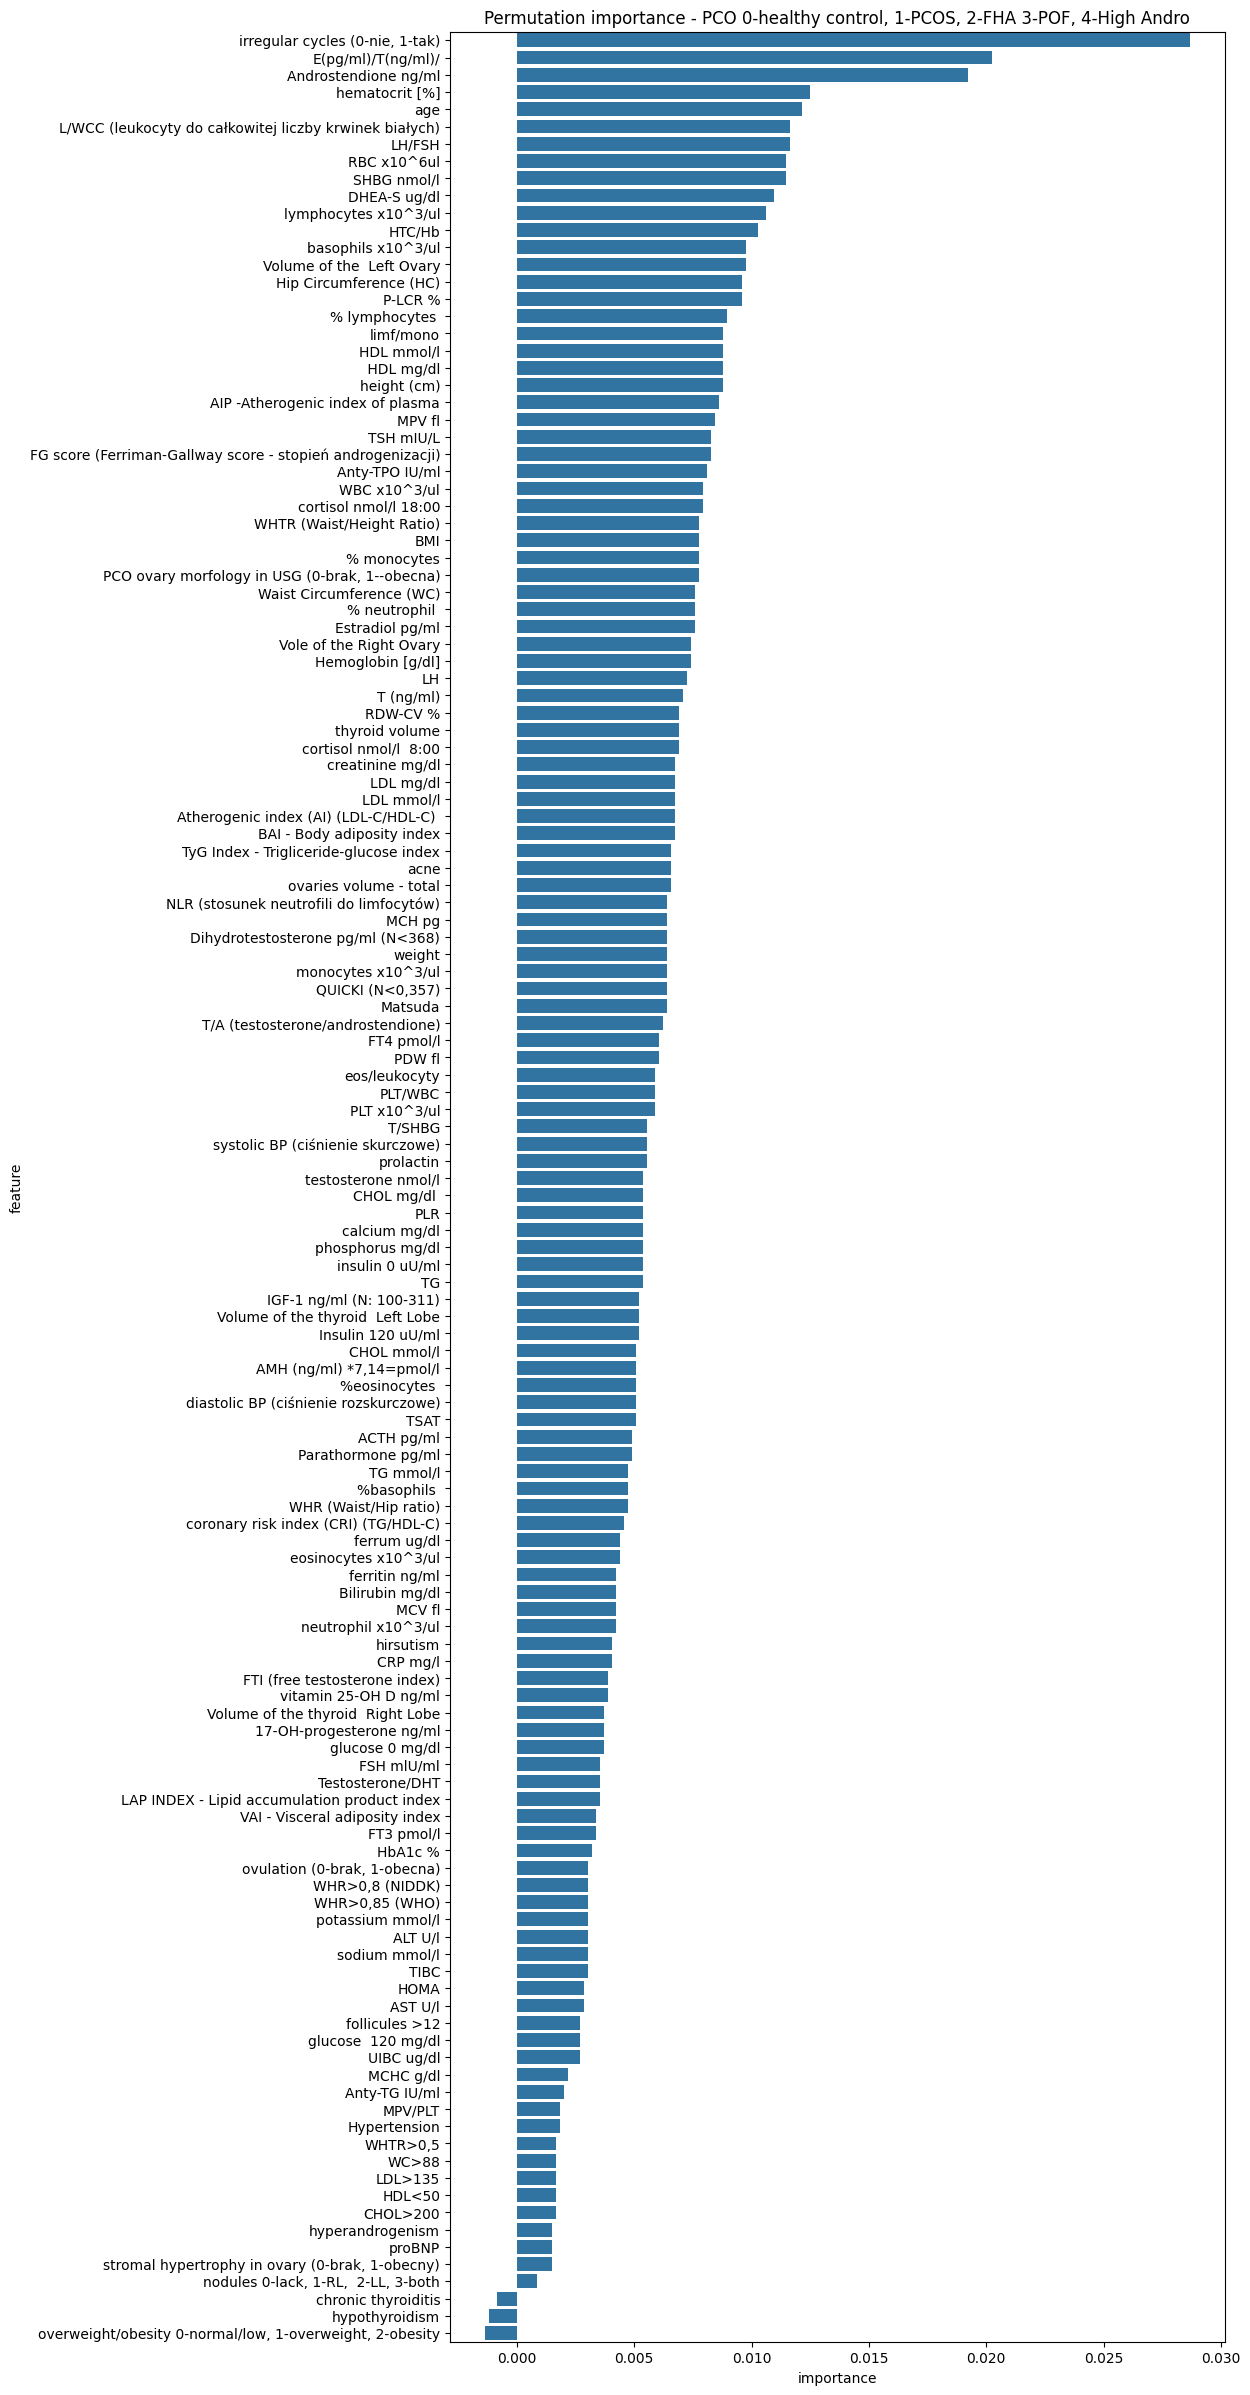

Actually selected 81 features


In [23]:
lasso_model = RandomForestClassifier(min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample')

selected_features_permutation_importance = get_permutation_importance(X_train, y_train, lasso_model, continuous_preprocessor, categorical_preprocessor, PCO)
selected_features_permutation_importance = selected_features_permutation_importance[selected_features_permutation_importance['importance'] > 0.005]
selected_features_map['permutation_importance'] = list(selected_features_permutation_importance['feature'].values)
print(f'Actually selected {len(selected_features_map['permutation_importance'])} features')
# selected_features_permutation_importance

In [24]:
intersection_all_sets = set(selected_features_map[next(iter(selected_features_map))])

for key, items in selected_features_map.items():
    intersection_all_sets.intersection_update(items)


intersection_all_sets = list(intersection_all_sets)
print(len(intersection_all_sets))
print(intersection_all_sets)

pd.DataFrame(intersection_all_sets)

7
['acne', 'SHBG nmol/l', 'Androstendione ng/ml', 'E(pg/ml)/T(ng/ml)/', 'irregular cycles (0-nie, 1-tak)', 'PCO ovary morfology in USG (0-brak, 1--obecna)', 'T/SHBG']


0
0                                            acne
1                                     SHBG nmol/l
2                            Androstendione ng/ml
3                              E(pg/ml)/T(ng/ml)/
4                 irregular cycles (0-nie, 1-tak)
5  PCO ovary morfology in USG (0-brak, 1--obecna)
6                                          T/SHBG

In [25]:
union_all_sets = set(selected_features_map[next(iter(selected_features_map))]) 

for key, items in selected_features_map.items():
    union_all_sets.update(items)
    

union_all_sets = list(union_all_sets)
print(len(union_all_sets))
print(union_all_sets)

122
['WHTR (Waist/Height Ratio)', 'MCH pg', 'Hemoglobin [g/dl]', 'TSAT', 'LDL mg/dl', 'E(pg/ml)/T(ng/ml)/', 'ALT U/l', 'ovaries volume - total', 'systolic BP (ciśnienie skurczowe)', 'ferritin ng/ml', 'HbA1c %', 'glucose 0 mg/dl', 'cortisol nmol/l  8:00', 'HDL<50', 'Volume of the thyroid  Left Lobe', 'FTI (free testosterone index)', 'potassium mmol/l', 'cortisol nmol/l 18:00', 'age', 'insulin 0 uU/ml', 'diastolic BP (ciśnienie rozskurczowe)', 'PDW fl', 'follicules >12', 'VAI - Visceral adiposity index', 'P-LCR %', 'TyG Index - Trigliceride-glucose index', 'hypothyroidism', 'HOMA', 'LH/FSH', 'FSH mlU/ml', 'DHEA-S ug/dl', 'Insulin 120 uU/ml', 'Hip Circumference (HC)', 'calcium mg/dl', 'RDW-CV %', 'HDL mmol/l', 'PLT/WBC', 'prolactin', ' HDL mg/dl', 'eos/leukocyty', 'RBC x10^6ul', 'ACTH pg/ml', '%eosinocytes ', 'WBC x10^3/ul', 'Waist Circumference (WC)', 'FG score (Ferriman-Gallway score - stopień androgenizacji)', 'LDL mmol/l', 'LAP INDEX - Lipid accumulation product index', 'AIP -Atheroge

## Feature subset testing

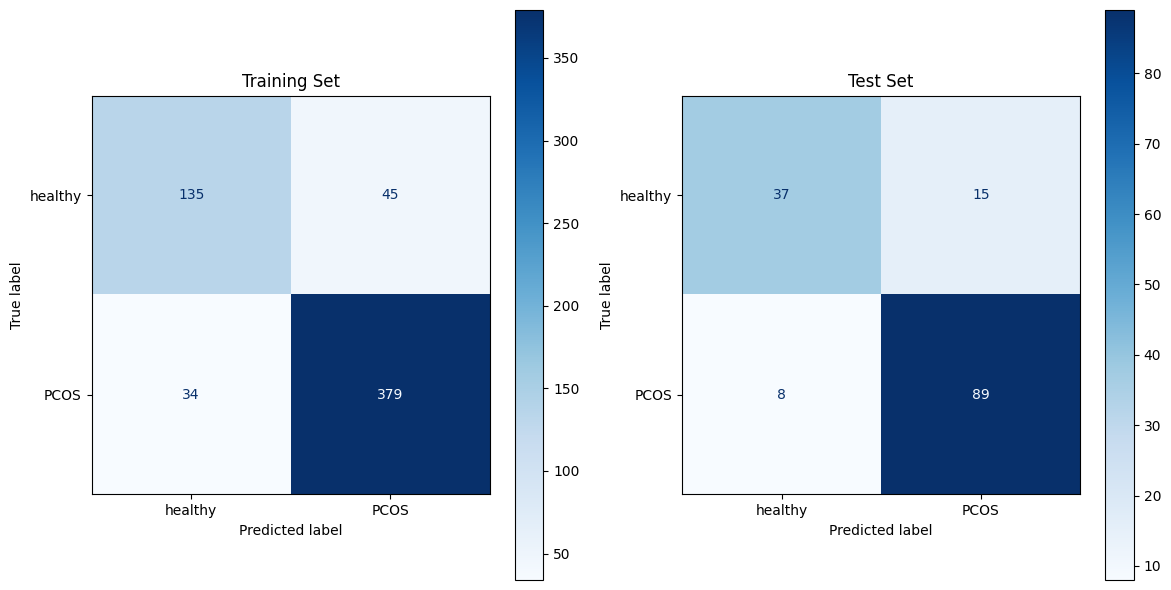

Training set
              precision    recall  f1-score   support

     healthy       0.80      0.75      0.77       180
        PCOS       0.89      0.92      0.91       413

    accuracy                           0.87       593
   macro avg       0.85      0.83      0.84       593
weighted avg       0.87      0.87      0.87       593

Test set
              precision    recall  f1-score   support

     healthy       0.82      0.71      0.76        52
        PCOS       0.86      0.92      0.89        97

    accuracy                           0.85       149
   macro avg       0.84      0.81      0.82       149
weighted avg       0.84      0.85      0.84       149



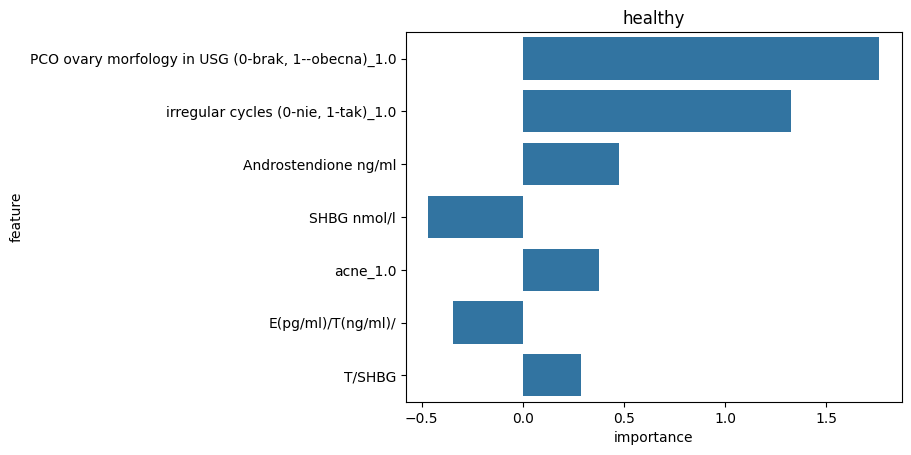

In [26]:
model_lr = LogisticRegression(C=0.1, max_iter=100000, n_jobs=-1)

feature_importnces_lr, pipeline_tlr = validate_model_classification(model_lr, PCO, CLASS_NAMES, X_train[intersection_all_sets], y_train, X_test[intersection_all_sets], y_test, continuous_preprocessor, categorical_preprocessor, get_feature_importance_logistic_regressison)

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


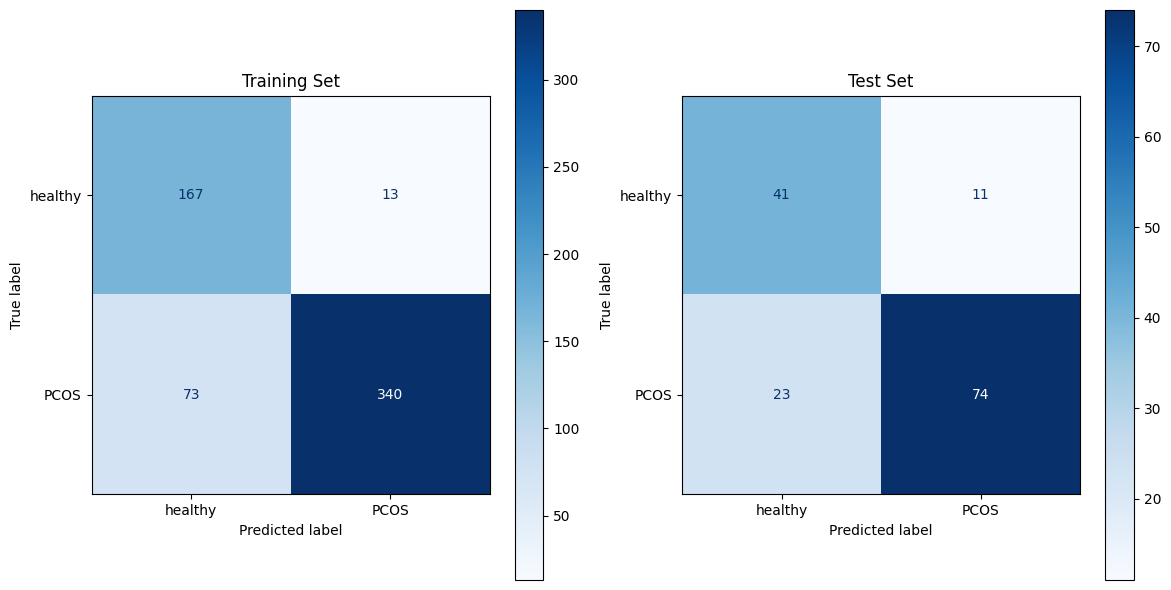

Training set
              precision    recall  f1-score   support

     healthy       0.70      0.93      0.80       180
        PCOS       0.96      0.82      0.89       413

    accuracy                           0.85       593
   macro avg       0.83      0.88      0.84       593
weighted avg       0.88      0.85      0.86       593

Test set
              precision    recall  f1-score   support

     healthy       0.64      0.79      0.71        52
        PCOS       0.87      0.76      0.81        97

    accuracy                           0.77       149
   macro avg       0.76      0.78      0.76       149
weighted avg       0.79      0.77      0.78       149



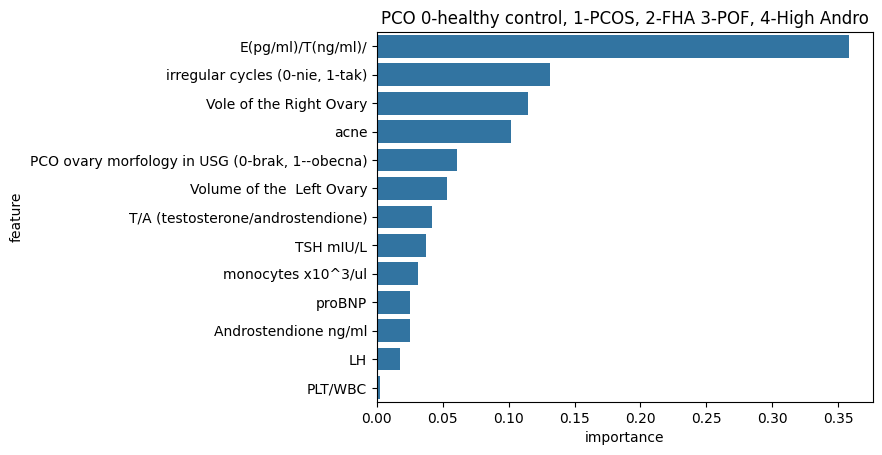

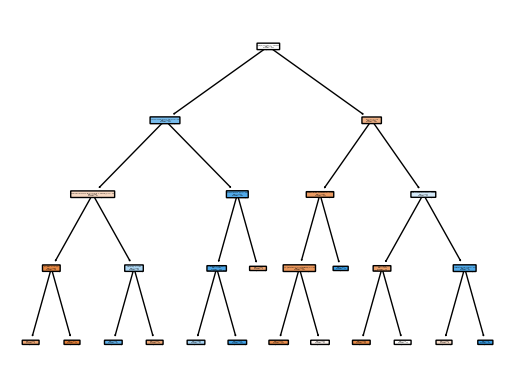

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


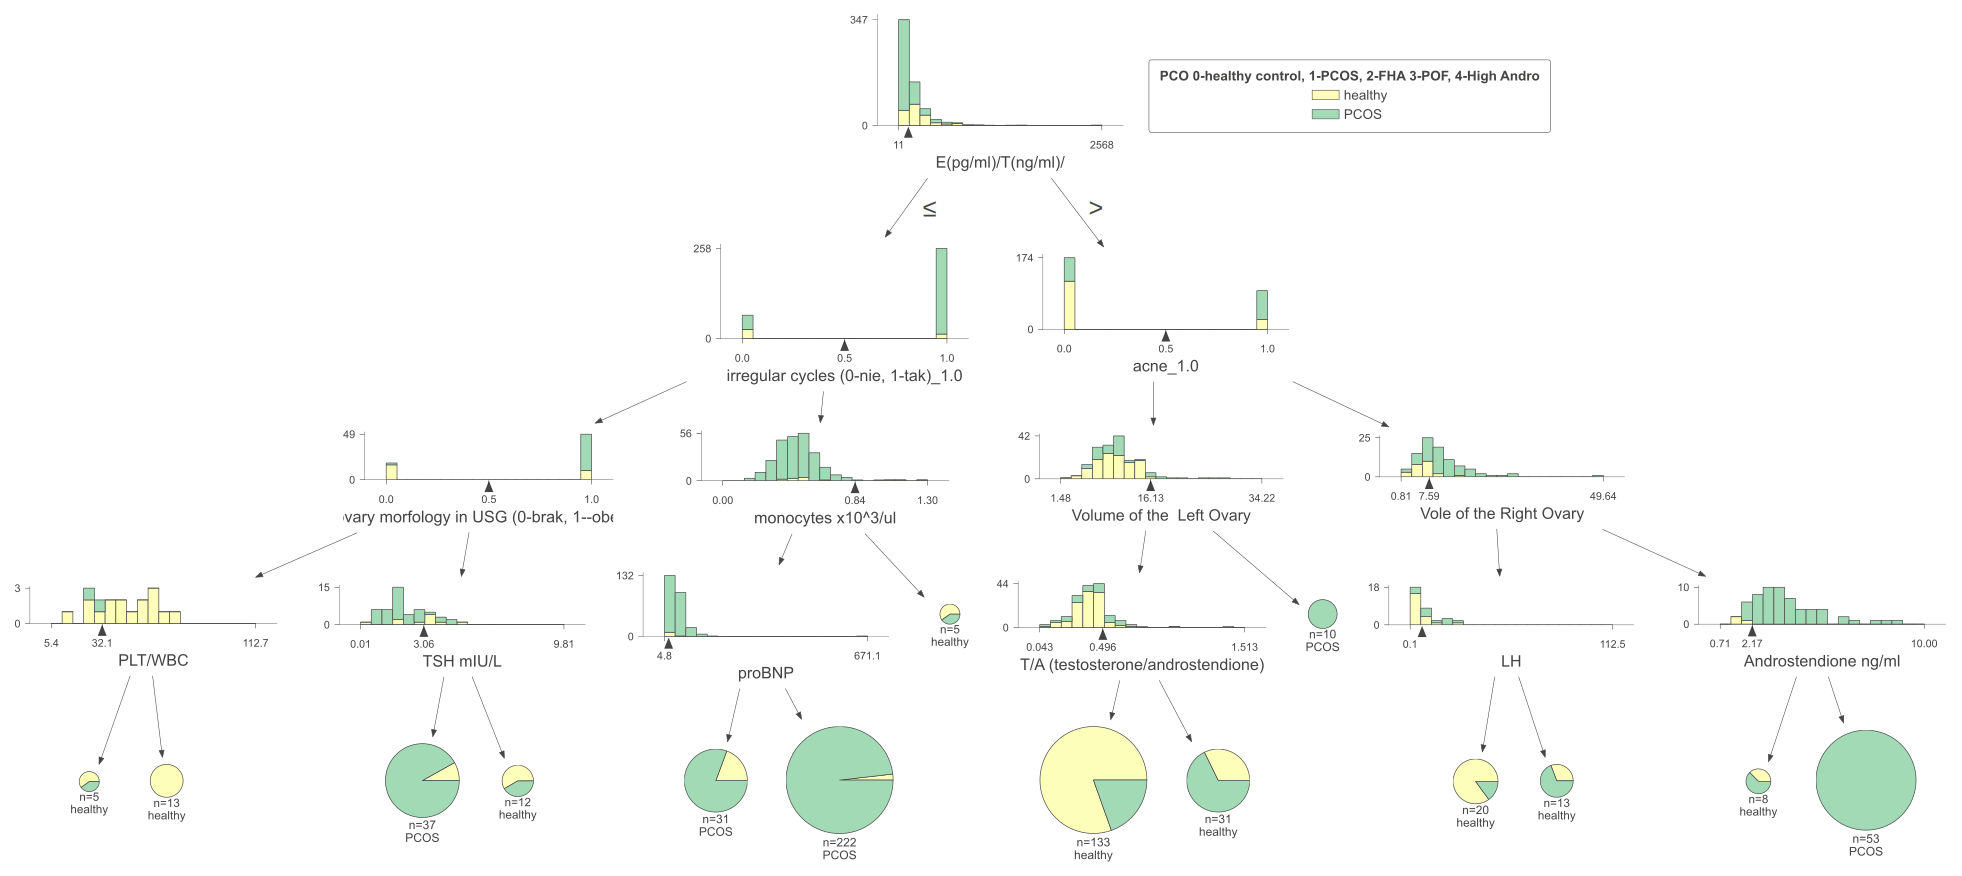

In [28]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=5, min_samples_split=4, class_weight='balanced')

feature_importnces_tree, pipeline_tree = validate_model_classification(model_tree, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_tree)

plot_fancy_tree(pipeline_tree, X_train, y_train, PCO, CLASS_NAMES)

c:\Users\karin\.Studia\magisterka\Master_project\.venv\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.


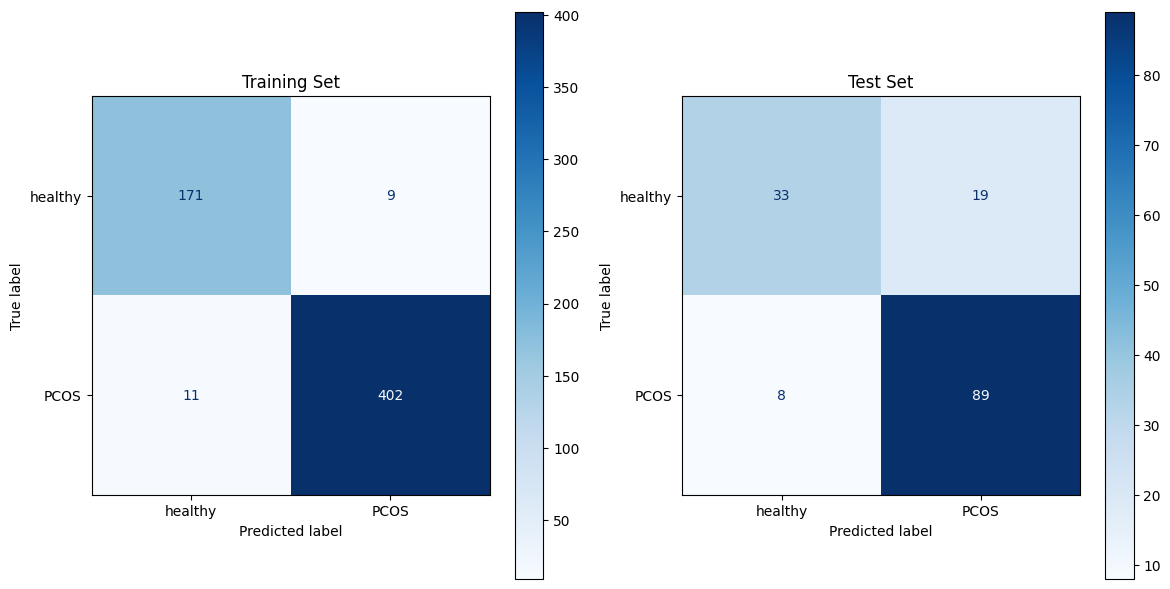

Training set
              precision    recall  f1-score   support

     healthy       0.94      0.95      0.94       180
        PCOS       0.98      0.97      0.98       413

    accuracy                           0.97       593
   macro avg       0.96      0.96      0.96       593
weighted avg       0.97      0.97      0.97       593

Test set
              precision    recall  f1-score   support

     healthy       0.80      0.63      0.71        52
        PCOS       0.82      0.92      0.87        97

    accuracy                           0.82       149
   macro avg       0.81      0.78      0.79       149
weighted avg       0.82      0.82      0.81       149



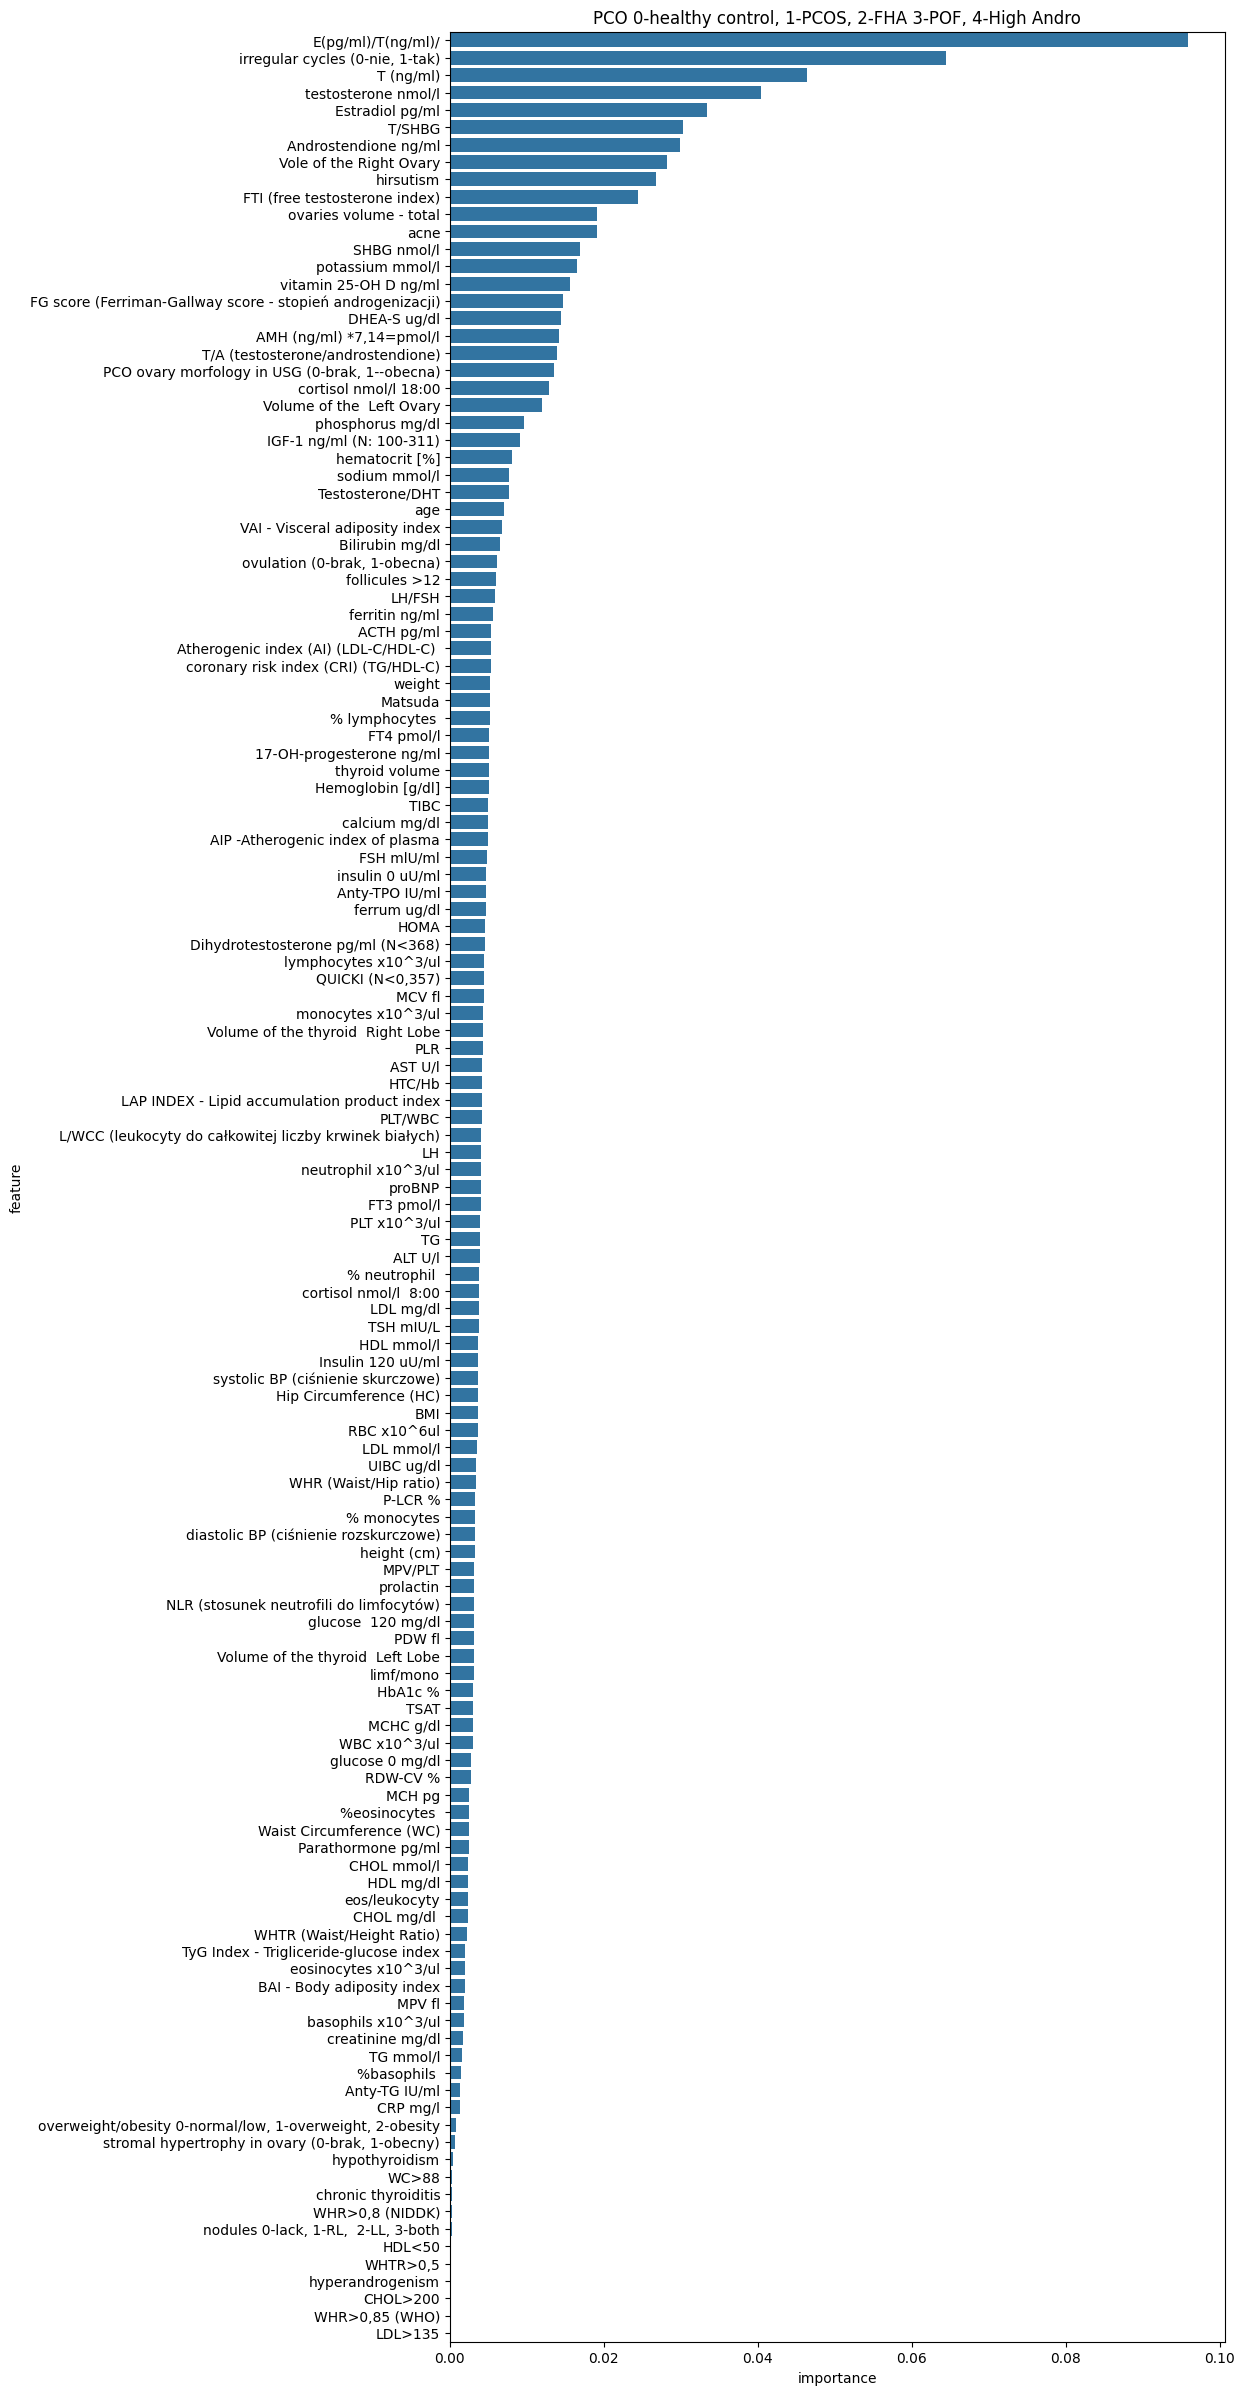

In [27]:
model_rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, max_features='sqrt', min_samples_leaf=7, min_samples_split=5, class_weight='balanced_subsample', random_state=72)

feature_importnces_rf, pipeline_rf = validate_model_classification(model_rf, PCO, CLASS_NAMES, X_train, y_train, X_test, y_test, continuous_preprocessor_tree, categorical_preprocessor, get_feature_importance_rf)